**In this Notebook I have decided to summarise everythin what I have learned from Week 1- to Week 7 about my Data set and applyed to it: Realestate in Austin, TX**


# <span style="color:blue">Week 2</span>

## Data Analys of Data set

In [83]:
# Re-importing libraries and reloading the dataset after state reset
import pandas as pd

# Load the dataset
file_path = "austinHousingData.csv"
df = pd.read_csv(file_path)

# 1. View First and Last Records
first_records = df.head()
last_records = df.tail()

# 2. Dataset Shape
dataset_shape = df.shape

# 3. Column Data Types and Information
dataset_info = df.info()

# 4. Statistical Summary for Numerical Columns
statistical_summary = df.describe()

first_records, last_records, dataset_shape, statistical_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15169 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

(         zpid          city          streetAddress  zipcode  \
 0   111373431  pflugerville   14424 Lake Victor Dr    78660   
 1   120900430  pflugerville     1104 Strickling Dr    78660   
 2  2084491383  pflugerville    1408 Fort Dessau Rd    78660   
 3   120901374  pflugerville     1025 Strickling Dr    78660   
 4    60134862  pflugerville  15005 Donna Jane Loop    78660   
 
                                          description   latitude  longitude  \
 0  14424 Lake Victor Dr, Pflugerville, TX 78660 i...  30.430632 -97.663078   
 1  Absolutely GORGEOUS 4 Bedroom home with 2 full...  30.432673 -97.661697   
 2  Under construction - estimated completion in A...  30.409748 -97.639771   
 3  Absolutely darling one story home in charming ...  30.432112 -97.661659   
 4  Brimming with appeal & warm livability! Sleek ...  30.437368 -97.656860   
 
    propertyTaxRate  garageSpaces  hasAssociation  ...  numOfMiddleSchools  \
 0             1.98             2            True  ...      

In [84]:
# Load necessary libraries
import pandas as pd

# Define file path and load dataset
file_path = "austinHousingData.csv"
df_housing = pd.read_csv(file_path)

# Summarize dataset using info() and describe()
print("\n=== Dataset Information ===")
df_housing.info()

# Generate statistical summary of numerical columns
dataset_description = df_housing.describe()
print("\n=== Dataset Description ===")
print(dataset_description)

# Check for duplicate rows
duplicate_rows = df_housing.duplicated().sum()
print(f"\n=== Duplicate Rows: {duplicate_rows} ===")

# Check for duplicate values per column
duplicate_values_per_column = df_housing.nunique()
print("\n=== Unique Values per Column ===")
print(duplicate_values_per_column)

# Convert to DataFrame for saving to CSV
duplicate_values_per_column_df = duplicate_values_per_column.to_frame(name="Unique Values")

# Calculate mean, median, and mode for numerical columns
numeric_df = df_housing.select_dtypes(include=['number'])
mean_values = numeric_df.mean()
median_values = numeric_df.median()
mode_values = numeric_df.mode().iloc[0]  # mode() returns a DataFrame, select first mode if multiple exist

# Check for missing values
missing_values = df_housing.isnull().sum()
print("\n=== Missing Values per Column ===")
print(missing_values)

# Convert missing values to DataFrame
missing_values_df = missing_values.to_frame(name="Missing Count")

# Create DataFrame for mean, median, and mode
stats_df = pd.DataFrame({"Mean": mean_values, "Median": median_values, "Mode": mode_values})

# Save outputs to CSV files for further analysis
dataset_description.to_csv("dataset_description.csv")
duplicate_values_per_column_df.to_csv("duplicate_values_per_column.csv")
missing_values_df.to_csv("missing_values.csv")
stats_df.to_csv("mean_median_mode.csv")

# Display final summary
print("\n=== Mean, Median, Mode for Numerical Columns ===")
print(stats_df)

# Indicate CSV file saving
print("\n✅ All summary statistics have been saved as CSV files.")


=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15169 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  ha

In [85]:
#Checking one more time missing values

# Re-import necessary libraries and reload the dataset after reset
import pandas as pd

# Load the dataset
file_path = "austinHousingData.csv"
df = pd.read_csv(file_path)

# Identify and summarize missing data
missing_data = df.isnull().sum().reset_index()
missing_data.columns = ['Column Name', 'Missing Values']
missing_data['Percentage Missing'] = (missing_data['Missing Values'] / len(df)) * 100
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)

missing_data.reset_index(drop=True, inplace=True)
print("\n=== Missing Data Summary ===")


=== Missing Data Summary ===


 ## 🚨 How to Handle Outliers in a Dataset

Outliers can significantly impact data analysis and machine learning models. Here’s a **comprehensive guide to identifying and handling outliers** in the Austin Housing dataset.

## Box plot (for numercical features)

Created Box Plot for 16 columns

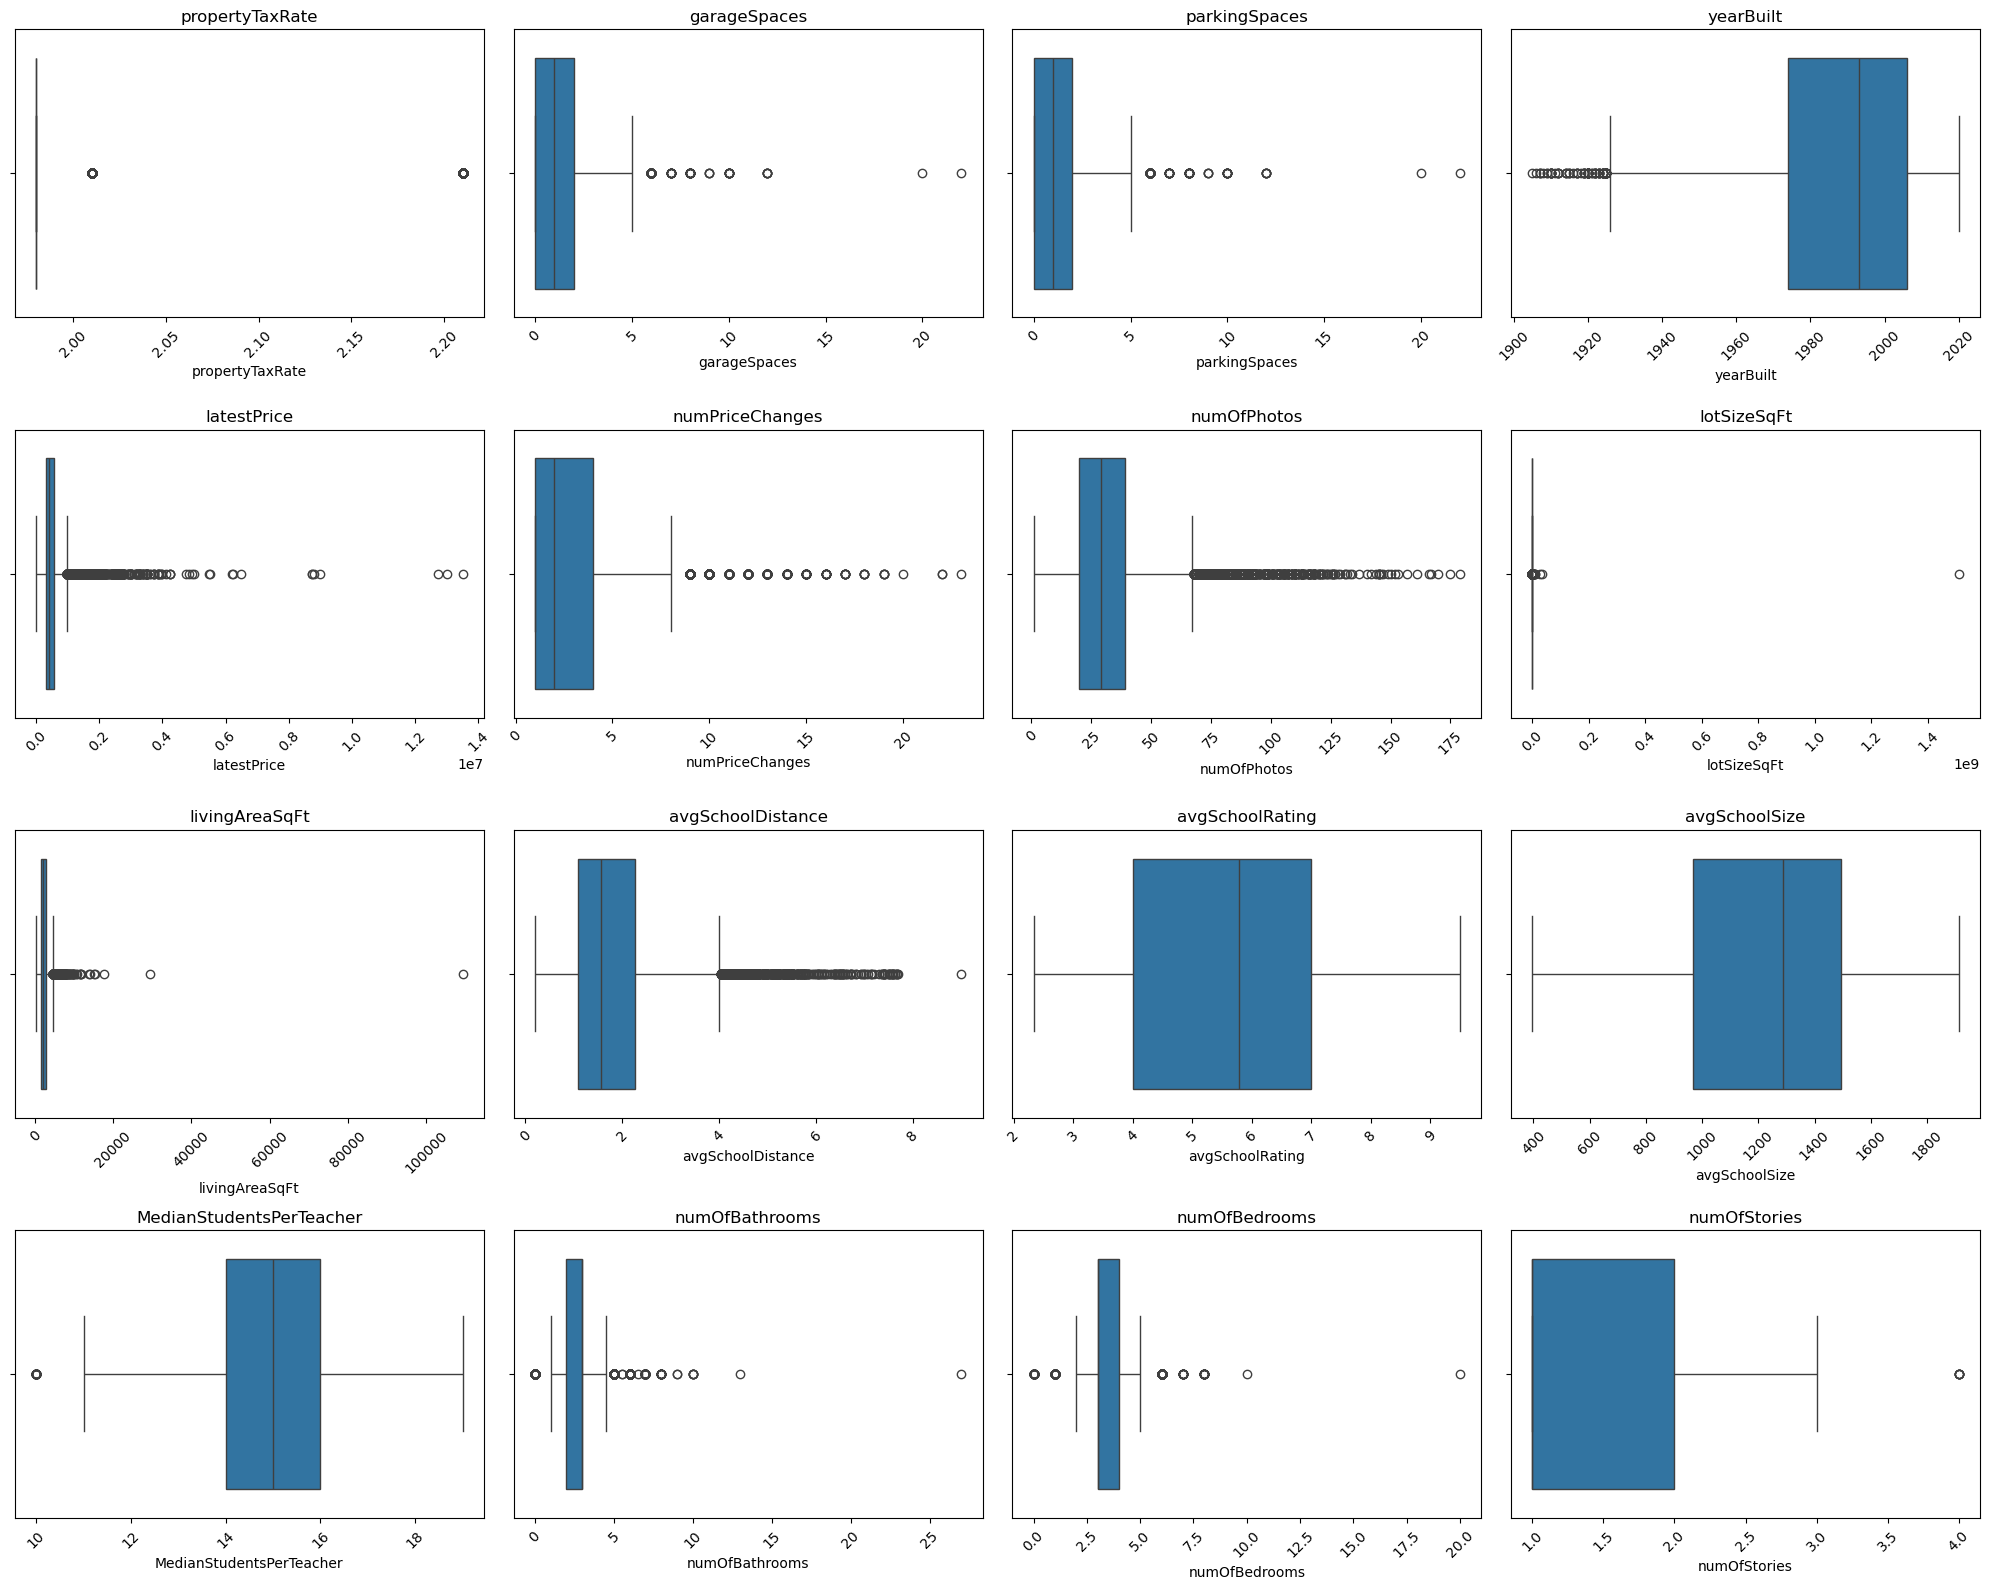

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "austinHousingData.csv"
df = pd.read_csv(file_path)

# List of selected numerical columns for box plots
selected_columns = [
    'propertyTaxRate', 'garageSpaces', 'parkingSpaces', 'yearBuilt',
    'latestPrice', 'numPriceChanges', 'numOfPhotos', 'lotSizeSqFt',
    'livingAreaSqFt', 'avgSchoolDistance', 'avgSchoolRating',
    'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
    'numOfBedrooms', 'numOfStories'
]

# Number of columns per row
cols = 4
rows = (len(selected_columns) + cols - 1) // cols  # Calculate required rows

# Set the figure size (adjust as needed for compactness)
plt.figure(figsize=(20, rows * 4))

# Plotting box plots in a grid layout
for i, col in enumerate(selected_columns):
    if col in df.columns:
        plt.subplot(rows, cols, i + 1)
        sns.boxplot(x=df[col])
        plt.title(f"{col}")
        plt.xticks(rotation=45)  # Rotate x-tick labels for better readability
        plt.tight_layout()
    else:
        print(f"Column '{col}' does not exist in the dataset.")

plt.show()

The latestPrice variable shows significant right-skewness with high-value outliers.


# 📌 What We Learn from This Code

This code is an initial exploratory data analysis (EDA) step, where we:

1. Understand the structure of the dataset (`info()`, `describe()`).
2. Identify duplicate rows and unique values in each column.
3. Analyze missing values, which is crucial for data preprocessing.
4. Compute statistical summaries (mean, median, mode) of numerical features.
5. Save the results as CSV files, enabling further exploration.

# 📖 1. Introduction

# 🏠 Austin Housing Data - Exploratory Data Analysis (EDA)

## **Objective**
This notebook performs **Exploratory Data Analysis (EDA)** on the `austinHousingData.csv` dataset.  
The goal is to:
- **Understand dataset structure**
- **Identify missing values and duplicates**
- **Analyze summary statistics of numerical columns**
- **Save insights for further data processing and machine learning**

## **Steps in this Notebook**
1. Load and clean the dataset 📂
2. Summarize dataset structure using `.info()` and `.describe()`
3. Identify duplicate rows and check unique values per column 📊
4. Analyze missing values 🛠
5. Compute mean, median, and mode for numerical features
6. Save the findings as CSV files for further use 📜

# 📌 2. Import Libraries

## Import necessary libraries
```
import pandas as pd
```

# 📌 3. Load the Dataset

## Define file path and load dataset
```
file_path = "austinHousingData.csv"
df_housing = pd.read_csv(file_path)
```

## Display the first few rows
```
df_housing.head()
```
🔹 **Why?**
- We first load the dataset into a Pandas DataFrame (`df_housing`).
- `head()` displays the first few rows to get a quick overview of the dataset.

# 📌 4. Data Overview - Structure & Summary 

## Display dataset info
```
print("\n=== Dataset Information ===")
df_housing.info()
```

## Generate statistical summary for numerical columns
```
dataset_description = df_housing.describe()
print("\n=== Dataset Description ===")
print(dataset_description)
```

## Save to CSV for further analysis
```
dataset_description.to_csv("dataset_description.csv")
```

🔹 **What We Learn?**
- `.info()` → Shows column data types, number of non-null values, and memory usage.
- `.describe()` → Provides summary statistics (mean, std, min, max, quartiles).

# 📌 5. Check for Duplicate Rows 

## Check for duplicate rows
```
duplicate_rows = df_housing.duplicated().sum()
print(f"\n=== Duplicate Rows in Dataset: {duplicate_rows} ===")
```

🔹 **Why?**
- Duplicate data can bias model performance and needs to be removed if necessary.

# 📌 6. Check Unique Values per Column

## Count unique values in each column
```
duplicate_values_per_column = df_housing.nunique()
print("\n=== Unique Values per Column ===")
print(duplicate_values_per_column)

# Convert to DataFrame and save
duplicate_values_per_column_df = duplicate_values_per_column.to_frame(name="Unique Values")
duplicate_values_per_column_df.to_csv("duplicate_values_per_column.csv")
```

🔹 **What We Learn?**
- Helps identify categorical variables with too many/few unique values.
- Ensures features are properly formatted (e.g., `ZipCode` should have multiple unique values).

# 📌 7. Missing Values Analysis

## Check for missing values
```
missing_values = df_housing.isnull().sum()
print("\n=== Missing Values per Column ===")
print(missing_values)
```

## Convert to DataFrame and save
```
missing_values_df = missing_values.to_frame(name="Missing Count")
missing_values_df.to_csv("missing_values.csv")
```

🔹 **Why?**
- Missing values can lead to data leakage or biased predictions.
- This helps us decide whether to remove, impute, or ignore missing values.

# 📌 8. Compute Mean, Median, and Mode for Numerical Features

## Select numerical columns
```
numeric_df = df_housing.select_dtypes(include=['number'])

# Compute mean, median, and mode
mean_values = numeric_df.mean()
median_values = numeric_df.median()
mode_values = numeric_df.mode().iloc[0]  # Select first mode if multiple exist

# Create DataFrame for better display
stats_df = pd.DataFrame({"Mean": mean_values, "Median": median_values, "Mode": mode_values})

# Display results
print("\n=== Mean, Median, Mode for Numerical Columns ===")
print(stats_df)

# Save to CSV
stats_df.to_csv("mean_median_mode.csv")
```

🔹 **Why?**
- **Mean**: Gives an idea of the central tendency of numerical features.
- **Median**: Helps handle skewed data.
- **Mode**: Useful for detecting categorical-like behavior in numerical data.

# 📌 9. Save Outputs for Further Analysis

## Save all outputs
```
dataset_description.to_csv("dataset_description.csv")
duplicate_values_per_column_df.to_csv("duplicate_values_per_column.csv")
missing_values_df.to_csv("missing_values.csv")
stats_df.to_csv("mean_median_mode.csv")
```

## Final confirmation message
```
print("\n✅ All summary statistics have been saved as CSV files.")
```

🔹 **Why?**
- Saves insights for further data preprocessing before machine learning.
- Allows for collaborative analysis by sharing structured data insights.

# 🎯 10. Conclusion

## ✅ Key Takeaways from This Analysis:
- **Dataset Overview:** We checked the structure using `.info()` and `.describe()`.
- **Duplicates & Unique Values:** Found duplicate rows and unique value counts per column.
- **Missing Values:** Identified columns with missing data.
- **Statistical Summaries:** Computed **Mean, Median, and Mode** for numerical features.
- **Data Saved:** Results stored in **CSV files** for future analysis.

# 🏡 Summary of Data Analysis for Austin Housing Dataset

---

## 📌 1. Dataset Overview  
- **Total Rows:** 15,171  
- **Total Columns:** 47  
- **Numerical Features:** 34  
- **Categorical Features:** 7  
- **Boolean Features:** 6  

---

## 📌 2. Duplicate Check  
✅ **No duplicate rows found.**  
🔹 Some columns (like `zipcode`) have repeating values, which is expected.  
🔹 **Unique identifiers like `zpid` should not have duplicates.**  

---

## 📌 3. Statistical Summary  
- **Mean, Median, and Mode calculated for all numerical columns.**  
- **Example:**  
  - 🏡 **Mean property tax rate:** 1.99%  
  - 💰 **Median latest price:** $294,944  
  - 🏙️ **Mode zipcode:** 78,748 (**most frequent ZIP code**)  

---

## 📌 4. Missing Values  
✅ **No missing values detected.**  
📌 **No imputation needed!**  

---

## 📌 5. Data Inconsistencies  
🔍 **Ensure homes were not sold before they were built.**  
📈 **Some homes have extreme values (very high prices, square footage, or features)**—may require further analysis.  

---

## 📌 6. Categorical Encoding  
⚡ **One-Hot Encoding required** for:  
- `homeType`  
- `city`  
- `latestPriceSource`  

🛠 **Encoding should be applied before modeling to avoid memory issues.**  

---

## 🔍 **Conclusions**  

✔️ **Is the dataset usable?** ✅ **Yes!** The dataset is complete and clean.  
✔️ **Do we need modifications?** 🚀 Encoding categorical variables & handling extreme values might help.  
✔️ **Is there class imbalance?** ⚖️ **No major imbalance detected**, but **ZIP codes may need balancing** if modeling location trends.  


# <span style="color:blue">Week 3</span>

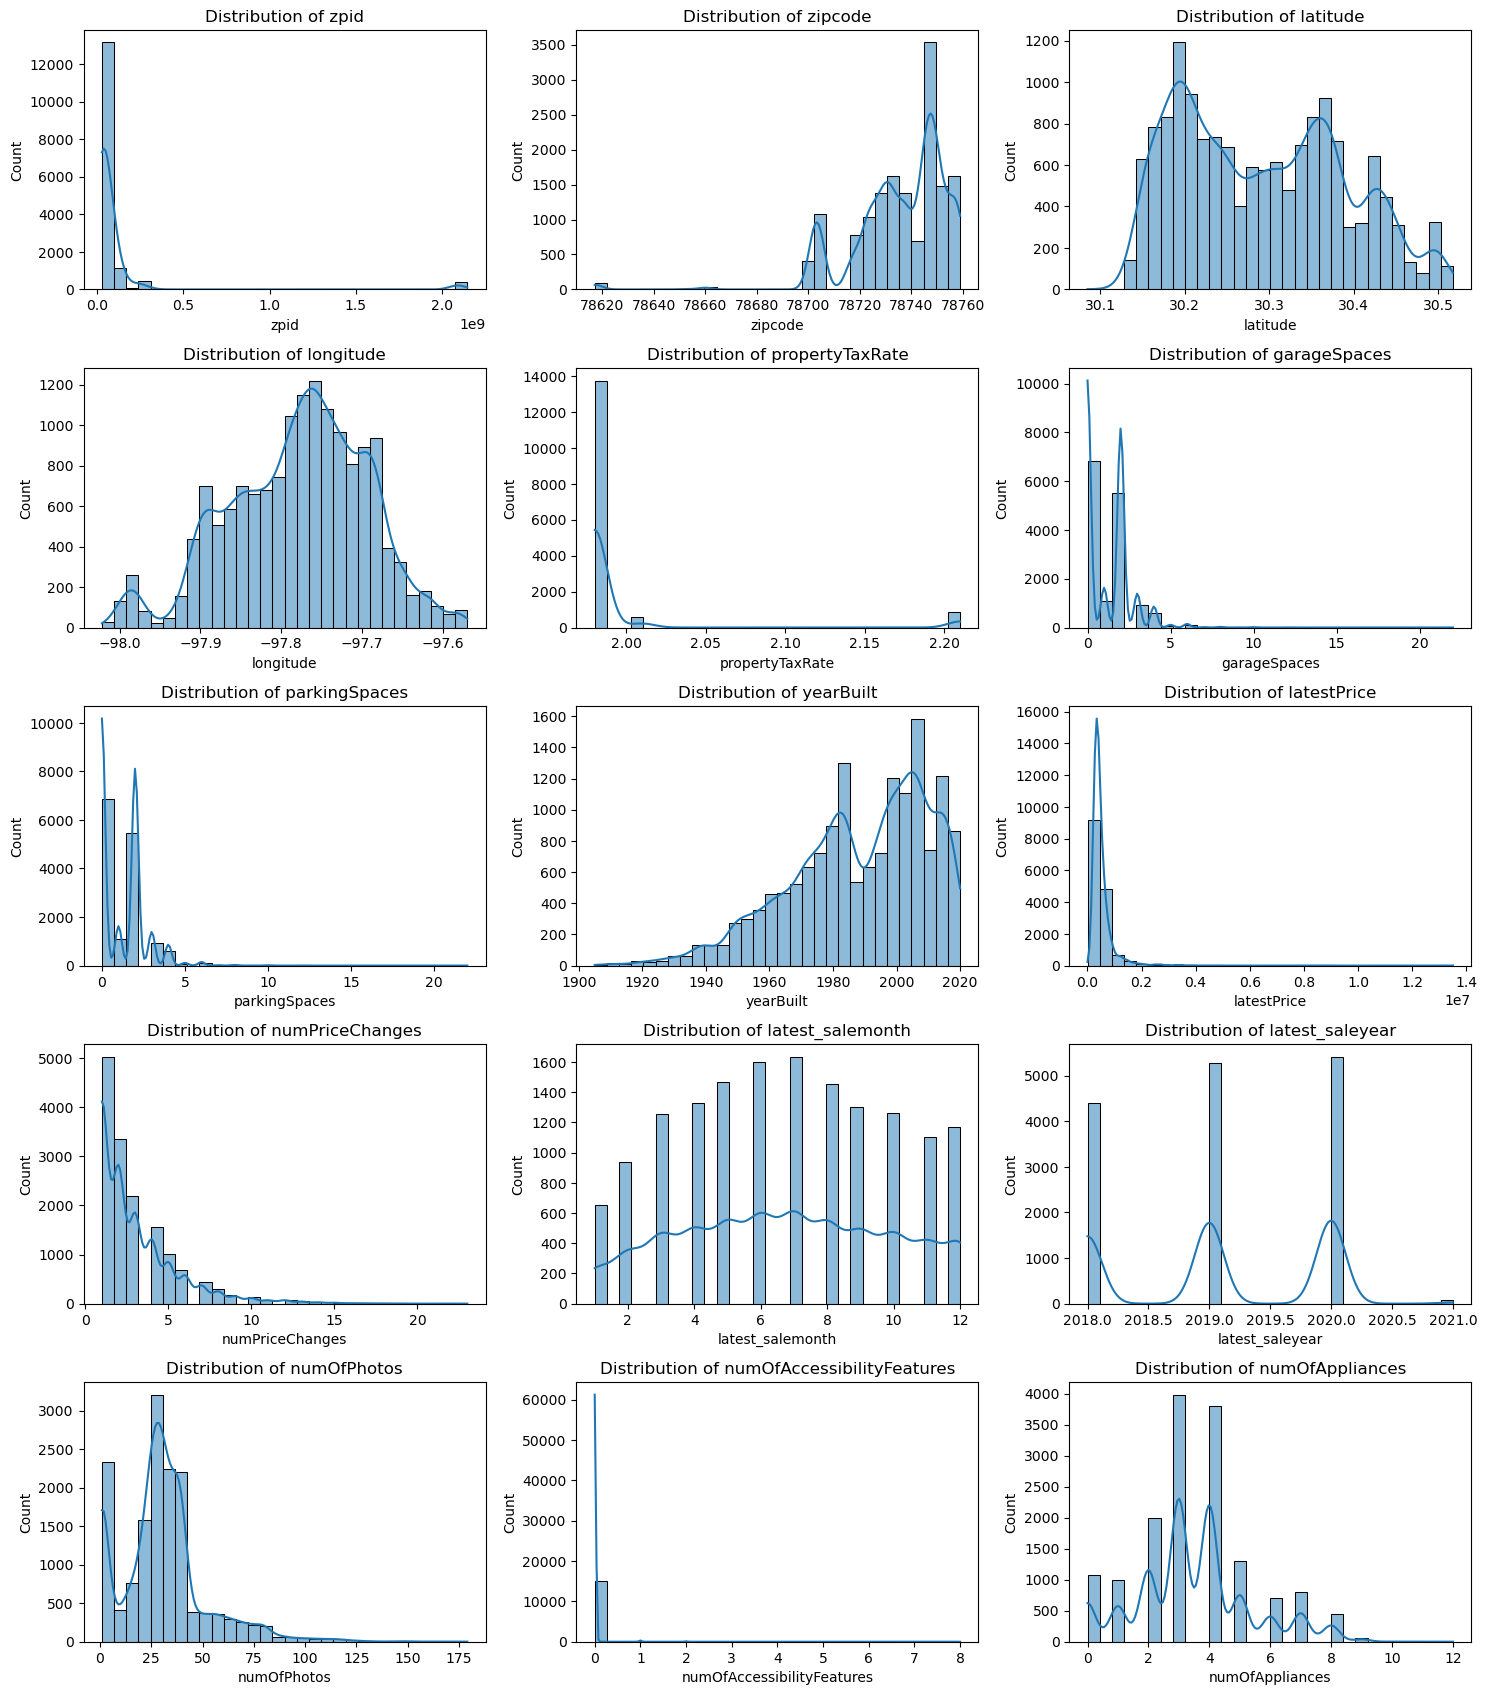


=== Univariate Analysis Summary Statistics ===

               zpid       zipcode      latitude     longitude  \
count  1.516900e+04  15169.000000  15169.000000  15169.000000   
mean   1.044273e+08  78735.933087     30.291599    -97.778524   
std    3.179627e+08     18.894662      0.096975      0.084715   
min    2.858495e+07  78617.000000     30.085030    -98.022057   
25%    2.941115e+07  78727.000000     30.203325    -97.837997   
50%    2.949441e+07  78739.000000     30.284416    -97.769508   
75%    7.033763e+07  78749.000000     30.366604    -97.717896   
max    2.146313e+09  78759.000000     30.517323    -97.569504   

       propertyTaxRate  garageSpaces  parkingSpaces     yearBuilt  \
count     15169.000000  15169.000000   15169.000000  15169.000000   
mean          1.994087      1.229086       1.224405   1988.554157   
std           0.053105      1.352177       1.352792     21.580572   
min           1.980000      0.000000       0.000000   1905.000000   
25%           1.9800

In [87]:
# Reload the dataset after execution state reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "austinHousingData.csv"
df_housing = pd.read_csv(file_path)

# Handle potential NaN values
df_housing = df_housing.dropna()

# Define numerical columns for Univariate Analysis
numeric_columns = df_housing.select_dtypes(include=['number']).columns

# Determine number of numeric columns
num_numeric_cols = len(numeric_columns)
num_plots = min(15, num_numeric_cols)  # Ensure no index error

# Set up plots dynamically
fig, axes = plt.subplots(nrows=(num_plots // 3) + 1, ncols=3, figsize=(15, 20))
axes = axes.flatten()

# Plot histograms for numeric columns
for i in range(num_plots):
    col = numeric_columns[i]
    sns.histplot(df_housing[col].dropna(), bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Hide unused subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Display summary statistics for numerical columns
summary_statistics = df_housing[numeric_columns].describe()
print("\n=== Univariate Analysis Summary Statistics ===\n")
print(summary_statistics)  # Print to console

# Save summary statistics to a CSV file
summary_statistics.to_csv("summary_statistics.csv", index=True)

# Identify categorical columns
categorical_columns = df_housing.select_dtypes(include=['object']).columns

# Count unique values in categorical columns
categorical_counts = {
    col: df_housing[col].value_counts().to_frame() for col in categorical_columns
}

# Display categorical distributions
print("\n=== Categorical Distributions ===\n")
for col, df in categorical_counts.items():
    print(f"\nDistribution for {col}:")
    print(df)  # Print category distribution to console
    
    # Save categorical distributions to CSV files
    df.to_csv(f"categorical_distribution_{col}.csv")

# 📌 What We Learn from This Code (Data Science Perspective)

# 🏠 Austin Housing Data - Univariate Analysis 🏡

## **Objective**
This notebook performs **Univariate Analysis** on the `austinHousingData.csv` dataset.  
The goal is to **understand the distributions** of numerical and categorical features.

## **Steps in this Notebook**
1. Load and clean the dataset 📂
2. Perform **Univariate Analysis** on numerical columns 📊
3. Analyze **categorical distributions** 📋
4. Save the insights for further analysis 📝

# 📌 2. Import Libraries

**Data Handling**
```
import pandas as pd
```

**Visualization Libraries**
```
import matplotlib.pyplot as plt
import seaborn as sns
```

# 📌 3. Load the Dataset

**Define file path**
```
file_path = "austinHousingData.csv"
```

**Load the dataset**
```
df_housing = pd.read_csv(file_path)
```

**Display the first 5 rows**
```
df_housing.head()
```

# 📌 4. Data Cleaning 

**Remove missing values**
```
df_housing = df_housing.dropna()
```

**Check data types and missing values**
```
df_housing.info()
```

🔹 Why?
	•	This ensures that we work with a clean dataset.
	•	Avoids errors in analysis due to missing values.

# 📌 5. Univariate Analysis - Numerical Variables 

**Select numerical columns**
```
numeric_columns = df_housing.select_dtypes(include=['number']).columns
```

**Display summary statistics**
```
summary_statistics = df_housing[numeric_columns].describe()
```

**Print statistics**
```
print("\n=== Univariate Analysis Summary Statistics ===\n")
print(summary_statistics)
```

**Save to CSV for further analysis**
```
summary_statistics.to_csv("summary_statistics.csv", index=True)
```

🔹 Why?
	•	Helps in understanding the distribution, mean, standard deviation, min/max values of numerical features.

# 📌 6. Plot Distributions of Numerical Features 

**Set number of plots (max 15 for readability)**
```
num_numeric_cols = len(numeric_columns)
num_plots = min(15, num_numeric_cols)
```

**Create subplots dynamically**
```
fig, axes = plt.subplots(nrows=(num_plots // 3) + 1, ncols=3, figsize=(15, 20))
axes = axes.flatten()
```

**Plot histograms for numeric columns**
```
for i in range(num_plots):
    col = numeric_columns[i]
    sns.histplot(df_housing[col].dropna(), bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
```

**Hide any unused subplots**
```
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
```

🔹 What We Learn?
	•	Shape of distributions (normal, skewed, multimodal).
	•	Presence of outliers in features like price, square footage, etc.

# 📌 7. Univariate Analysis - Categorical Variables 

**Select categorical columns**
```
categorical_columns = df_housing.select_dtypes(include=['object']).columns
```

**Count unique values in categorical columns**
```
categorical_counts = {
    col: df_housing[col].value_counts().to_frame() for col in categorical_columns
}
```

**Display categorical distributions**
```
print("\n=== Categorical Distributions ===\n")
for col, df in categorical_counts.items():
    print(f"\nDistribution for {col}:")
    print(df)

```

**Save to CSV for further analysis**
```
df.to_csv(f"categorical_distribution_{col}.csv")
```

🔹 What We Learn?
	•	Which categories dominate (e.g., most common housing types).
	•	Whether imbalanced categories exist (which might affect ML models).

# 📌 8. Save Outputs for Further Analysis 

**Save summary statistics and categorical distributions**
```
summary_statistics.to_csv("summary_statistics.csv", index=True)
for col, df in categorical_counts.items():
    df.to_csv(f"categorical_distribution_{col}.csv")
```

🔹 Why?
	•	Saves data for further feature engineering & machine learning.

🎯 Conclusion

**✅ Key Takeaways:**
- **Numerical Features:** Show different distributions and variations.
- **Categorical Features:** Help in understanding data diversity.
- **Histograms:** Show potential outliers and skewness.
- **Saved CSV Files:** Useful for deeper analysis and modeling.




# 🏠 Austin Housing Data - Univariate Analysis 📊

## **Objective**
This notebook performs **Univariate Analysis** on the `austinHousingData.csv` dataset to:
- **Understand dataset structure** and detect missing values.
- **Analyze distributions of numerical features** using histograms.
- **Identify unique values in categorical features**.
- **Extract summary statistics** for feature engineering.
- **Save insights for further machine learning applications**.

---

## **🔹 1. Understanding the Dataset**
### **What We Did**
- Loaded the dataset into a Pandas DataFrame.
- Removed missing values to clean the data.
- Identified **numerical and categorical columns**.

### **Key Learnings**
✅ **Missing Data Handling**: If a large portion of data was removed, we might need to **impute missing values instead**.  
✅ **Data Integrity**: Checking for missing and duplicate values ensures **clean input for machine learning models**.  

---

## **🔹 2. Statistical Summary of Numerical Features**
### **What We Did**
- Used `.describe()` to compute:
  - **Mean, Median, Standard Deviation, Min, Max, Quartiles**.

### **Key Learnings**
✅ **If Mean ≠ Median** → The feature is **skewed**, and we may need **log transformation**.  
✅ **A high standard deviation** → The feature has a **wide spread**, meaning values are not concentrated.  
✅ **Min & Max values show outliers**, which may need **removal or transformation**.  

📌 **Example:**  
- If the **"House Price"** column has **a very large max value compared to the median**, it might indicate **outliers** (luxury properties that differ from typical homes).  

---

## **🔹 3. Data Distribution Analysis (Histograms & KDE Plots)**
### **What We Did**
- Plotted **histograms** and **Kernel Density Estimation (KDE) plots** for numerical features.

### **Key Learnings**
✅ **Normally distributed data** → Ideal for many machine learning models.  
✅ **Right-skewed or left-skewed data** → Might need **scaling (log transformation, standardization, etc.)**.  
✅ **Bimodal distributions** → Suggest **two separate groups** exist in the data.  

📌 **Example:**  
- If the **square footage of homes** is **bimodal**, it could indicate **two different property types (apartments vs. houses).**  

---

## **🔹 4. Categorical Feature Analysis**
### **What We Did**
- Counted **unique values per categorical feature**.
- Checked for **imbalanced categories**.

### **Key Learnings**
✅ **If a category has too many unique values** → It might not be useful (e.g., `Street Name` may not help a model).  
✅ **If one category dominates** → The feature might not contribute much information to predictions.  
✅ **Categorical encoding (One-Hot Encoding, Label Encoding)** is needed before ML models can use categorical data.

📌 **Example:**  
- If **"Neighborhood"** has 100+ unique values, we might **group similar areas together** or use **target encoding** instead of one-hot encoding.  

---

## **🔹 5. Handling Missing Values**
### **What We Did**
- Identified missing values in each column.
- Determined the **number of missing values per column**.

### **Key Learnings**
✅ **A large number of missing values in a column?** → Consider **removing the column or imputing values**.  
✅ **Few missing values?** → Use **median or mode imputation** instead of dropping rows.  

📌 **Example:**  
- If **"Year Built"** has missing values, we can **fill them with the median year** instead of dropping them.  

---

## **🔹 6. Saving Data for Further Analysis**
### **What We Did**
- Saved **summary statistics** and **categorical distributions** as CSV files.

### **Why?**
✅ **Preprocessed data can be used for feature engineering & model training.**  
✅ **Storing summary statistics helps with reproducibility and debugging.**  

📌 **Example:**  
- Saving `summary_statistics.csv` helps keep track of feature changes during **data preprocessing**.

---

## **🎯 Final Takeaways**
✅ **Numerical Data Insights**: We detected **skewness & outliers**, which impact feature transformations.  
✅ **Categorical Data Insights**: We identified **imbalanced categories** and the need for **encoding**.  
✅ **Histograms & KDE Plots**: Showed **distribution patterns** and **highlighted necessary transformations**.  
✅ **Missing Values**: Identified columns needing **imputation or removal**.  

---

# <span style="color:blue">Week 4</span>

## Data Analys of Data set

# 🏠 Austin Housing Data - Exploratory Data Analysis (EDA) 📊

## **Objective**
This notebook performs **Exploratory Data Analysis (EDA)** on the `austinHousingData.csv` dataset to:
- **Visualize distributions of numerical features** using histograms, KDE plots, violin plots, and swarm plots.
- **Compare grouped histograms** based on categorical variables (e.g., bedroom count).
- **Analyze categorical distributions** using bar plots.
- **Compute statistical summaries (Mean, Median, Mode)** for numerical features.
- **Evaluate dataset usability for machine learning models**.

---

## **🔹 1. Load the Dataset & Understand Its Structure**
### **What We Do?**
- Load the dataset using Pandas.
- Display the first few rows to check the column structure.
- Identify **numerical and categorical features**.
- Check for missing values.

### **Key Learnings**
✅ Understanding data structure helps in **data cleaning and transformation**.  
✅ Identifying missing values helps in **deciding imputation strategies**.  

In [88]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "austinHousingData.csv"
df_housing = pd.read_csv(file_path)

# Display the first few rows
df_housing.head()

# Identify numerical and categorical columns
numeric_columns = df_housing.select_dtypes(include=['number']).columns
categorical_columns = df_housing.select_dtypes(include=['object']).columns

# Check for missing values
missing_values = df_housing.isnull().sum()
print("\n=== Missing Values per Column ===\n", missing_values)


=== Missing Values per Column ===
 zpid                          0
city                          0
streetAddress                 0
zipcode                       0
description                   2
latitude                      0
longitude                     0
propertyTaxRate               0
garageSpaces                  0
hasAssociation                0
hasCooling                    0
hasGarage                     0
hasHeating                    0
hasSpa                        0
hasView                       0
homeType                      0
parkingSpaces                 0
yearBuilt                     0
latestPrice                   0
numPriceChanges               0
latest_saledate               0
latest_salemonth              0
latest_saleyear               0
latestPriceSource             0
numOfPhotos                   0
numOfAccessibilityFeatures    0
numOfAppliances               0
numOfParkingFeatures          0
numOfPatioAndPorchFeatures    0
numOfSecurityFeatures         0
numO

## **🔹 2. Univariate Analysis - Histograms & Variants**
### **What We Do?**
- Plot **histograms** to visualize numerical feature distributions.
- Overlay **KDE plots** to see probability density.
- Use **Violin plots** and **Swarm plots** for deeper distribution insights.

### **Key Learnings**
✅ **Normal vs. Skewed Distributions** → Check if features need transformations.  
✅ **Bimodal Distributions** → Indicate distinct property groups.  
✅ **Outliers Detection** → Spot extreme values that may affect model training.  

In [ ]:
# Set up figure for histograms
fig, axes = plt.subplots(nrows=len(numeric_columns) // 3 + 1, ncols=3, figsize=(18, 30))
axes = axes.flatten()

# Plot histograms with KDE for each numerical column
for i, col in enumerate(numeric_columns):
    sns.histplot(df_housing[col].dropna(), bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_38103/2294179655.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_housing, x="numOfBedrooms", y=col, ax=axes[i], inner="quartile", palette="muted")
/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_38103/2294179655.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_housing, x="numOfBedrooms", y=col, ax=axes[i], inner="quartile", palette="muted")
/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_38103/2294179655.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sa

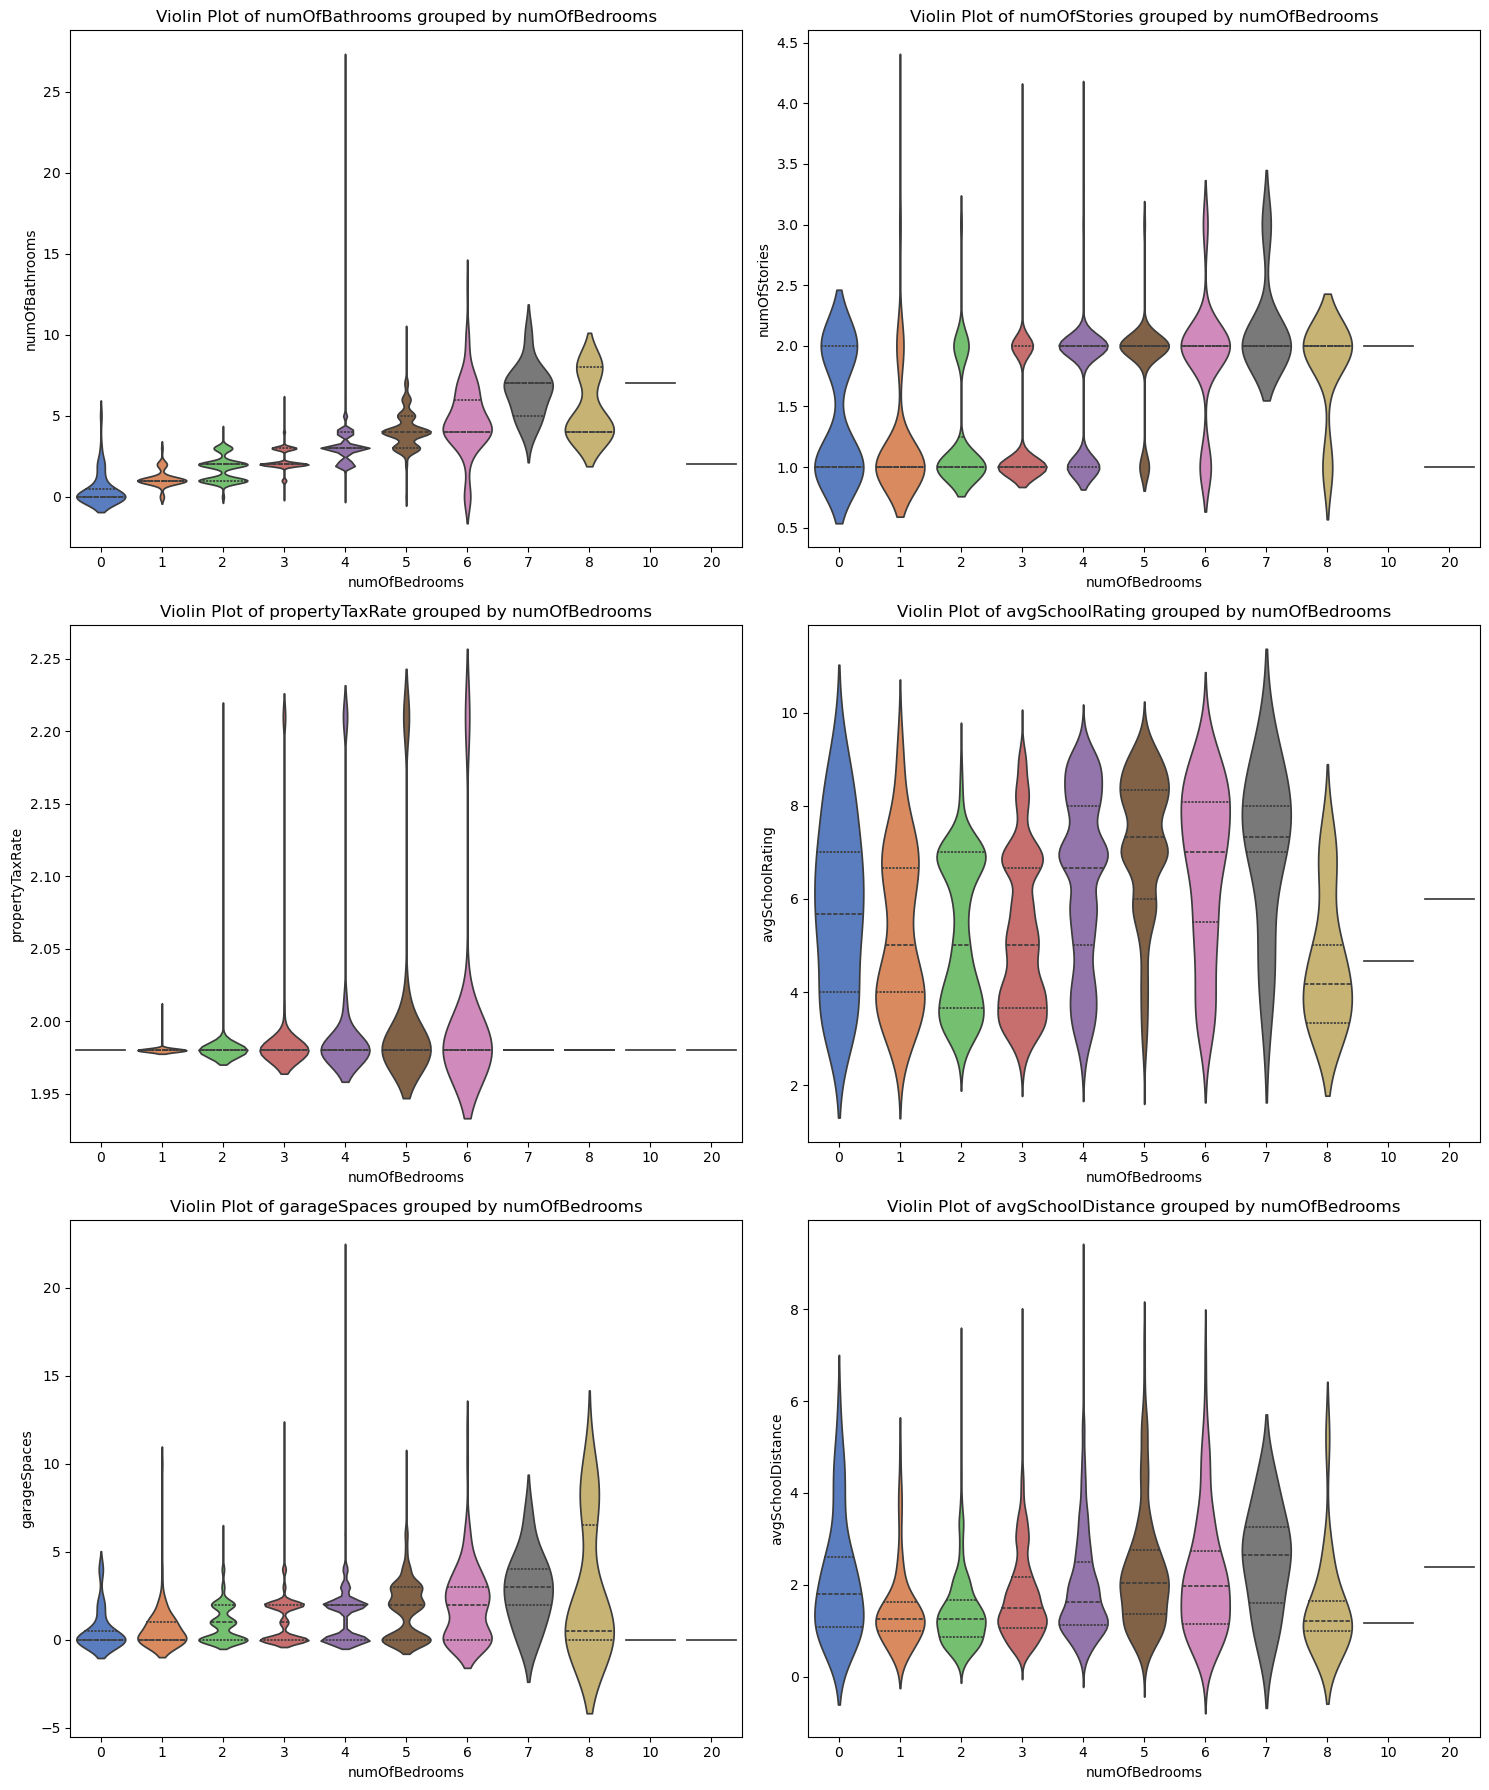

In [ ]:
# Set up figure for violin plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
axes = axes.flatten()

# Select key numerical features for visualization
num_features = ["numOfBathrooms", "numOfStories", "propertyTaxRate", "avgSchoolRating", "garageSpaces", "avgSchoolDistance"]

# Plot violin plots for numerical distributions
for i, col in enumerate(num_features):
    sns.violinplot(data=df_housing, x="numOfBedrooms", y=col, ax=axes[i], inner="quartile", palette="muted")
    axes[i].set_title(f'Violin Plot of {col} grouped by numOfBedrooms')

plt.tight_layout()
plt.show()

## **🔹 3. Grouped Histograms**
### **What We Do?**
- Compare distributions across **different categories** (e.g., bedroom count).
- Helps understand **how different groups impact a feature**.

### **Key Learnings**
✅ Helps detect **trends and relationships** in data.  
✅ Highlights **differences in property characteristics** across categories.  

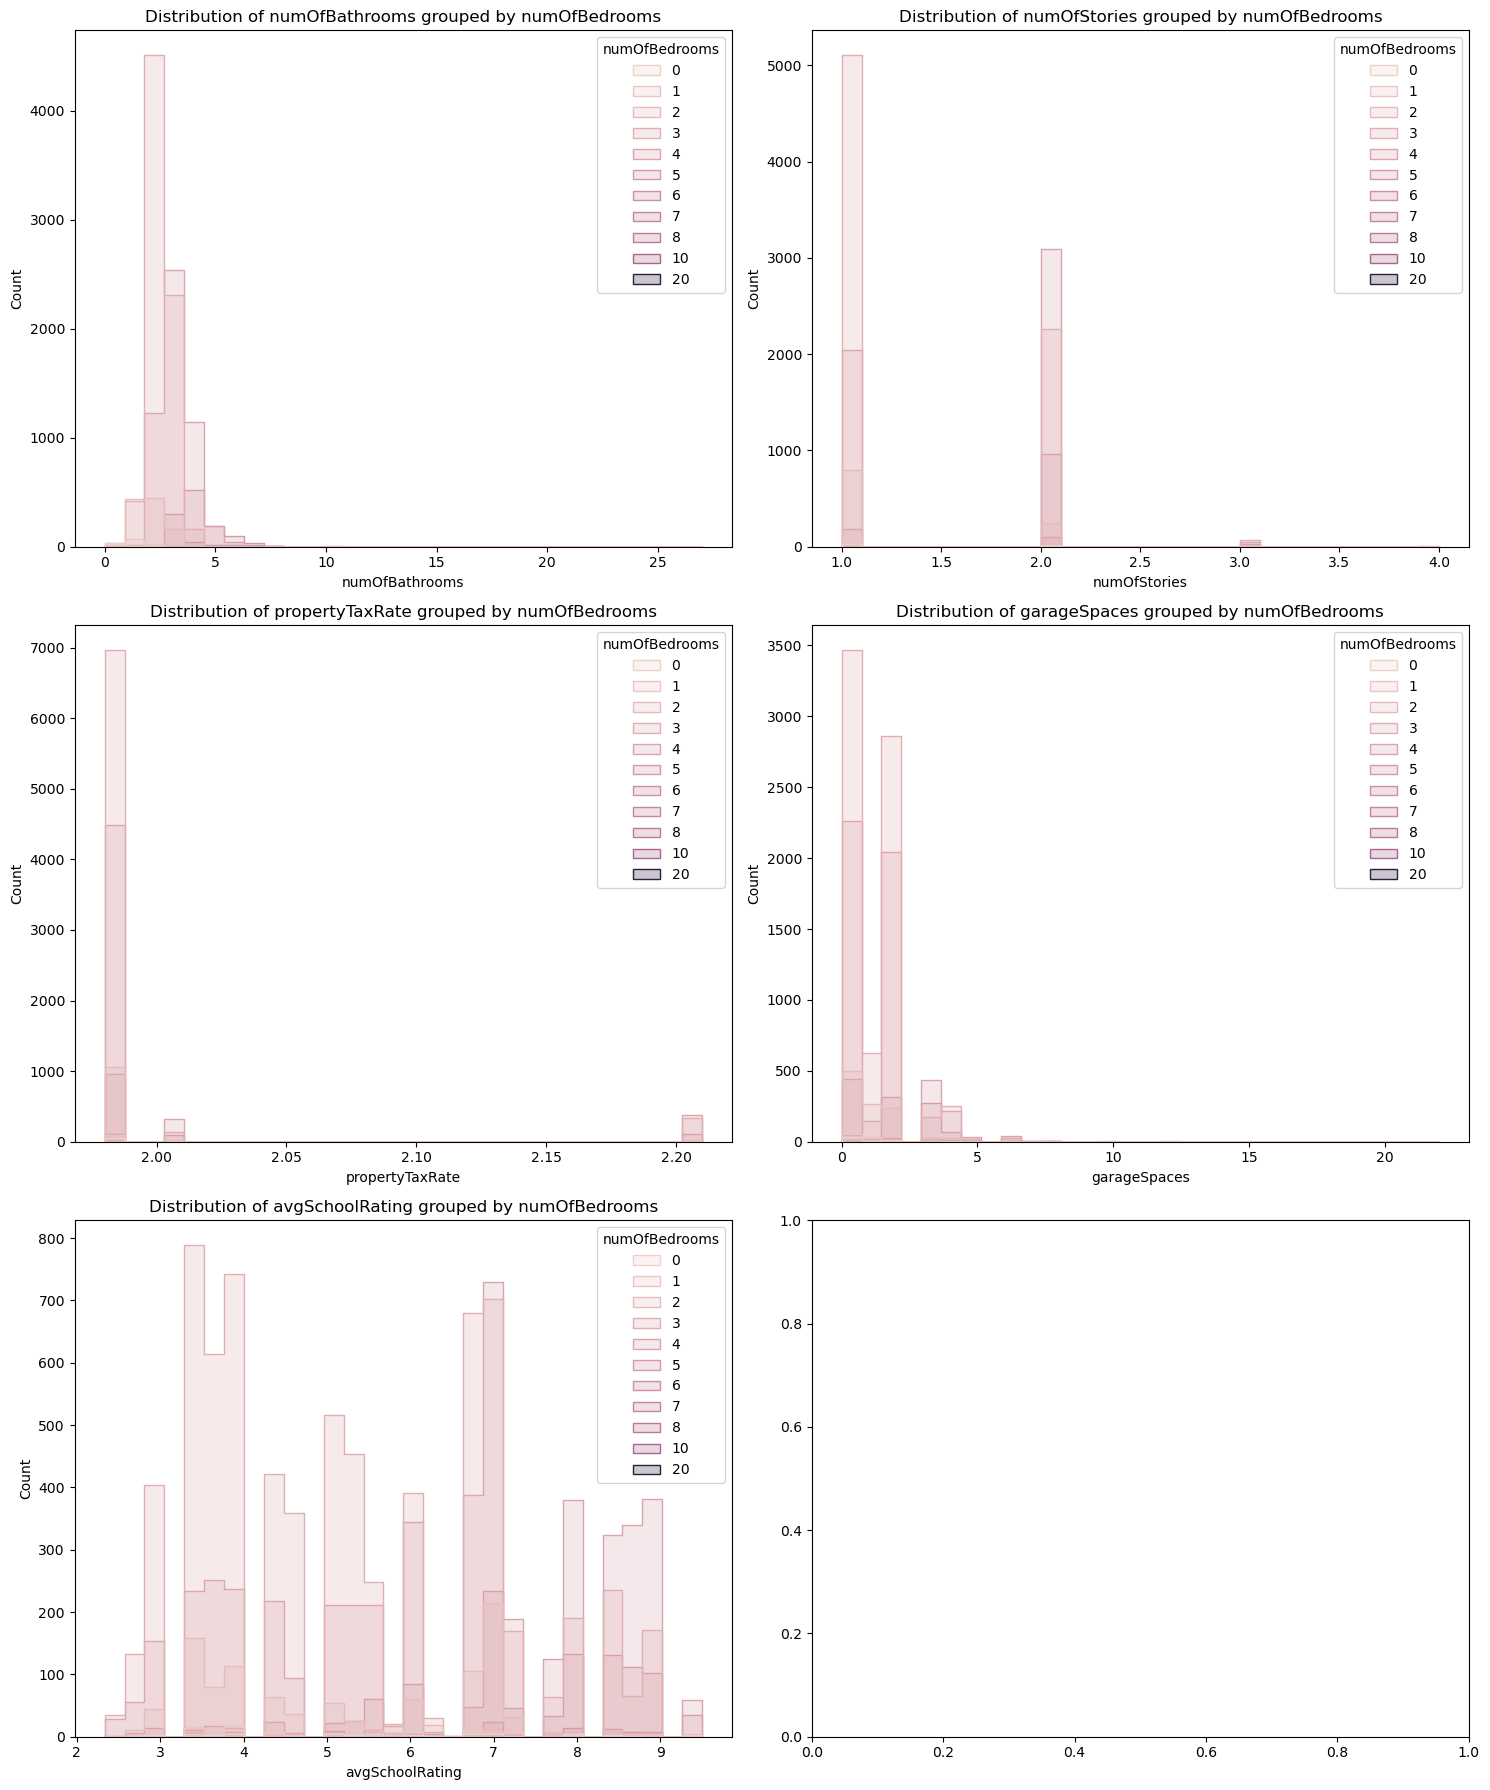

In [ ]:
# Set up grouped histograms for selected numerical features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
axes = axes.flatten()

# Numerical features to compare across bedroom groups
num_features_grouped = ["numOfBathrooms", "numOfStories", "propertyTaxRate", "garageSpaces", "avgSchoolRating"]

# Plot grouped histograms
for i, col in enumerate(num_features_grouped):
    sns.histplot(data=df_housing, x=col, hue="numOfBedrooms", element="step", bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} grouped by numOfBedrooms')

plt.tight_layout()
plt.show()

## **🔹 4. Categorical Data Analysis**
### **What We Do?**
- **Bar plots** for total counts of categorical variables.

### **Key Learnings**
✅ Identifies **dominant categories** and **imbalanced data**.  
✅ Helps decide **which features to encode** for machine learning.  

/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_38103/1220561640.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_38103/1220561640.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_38103/1220561640.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_38103/1220561640.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. a

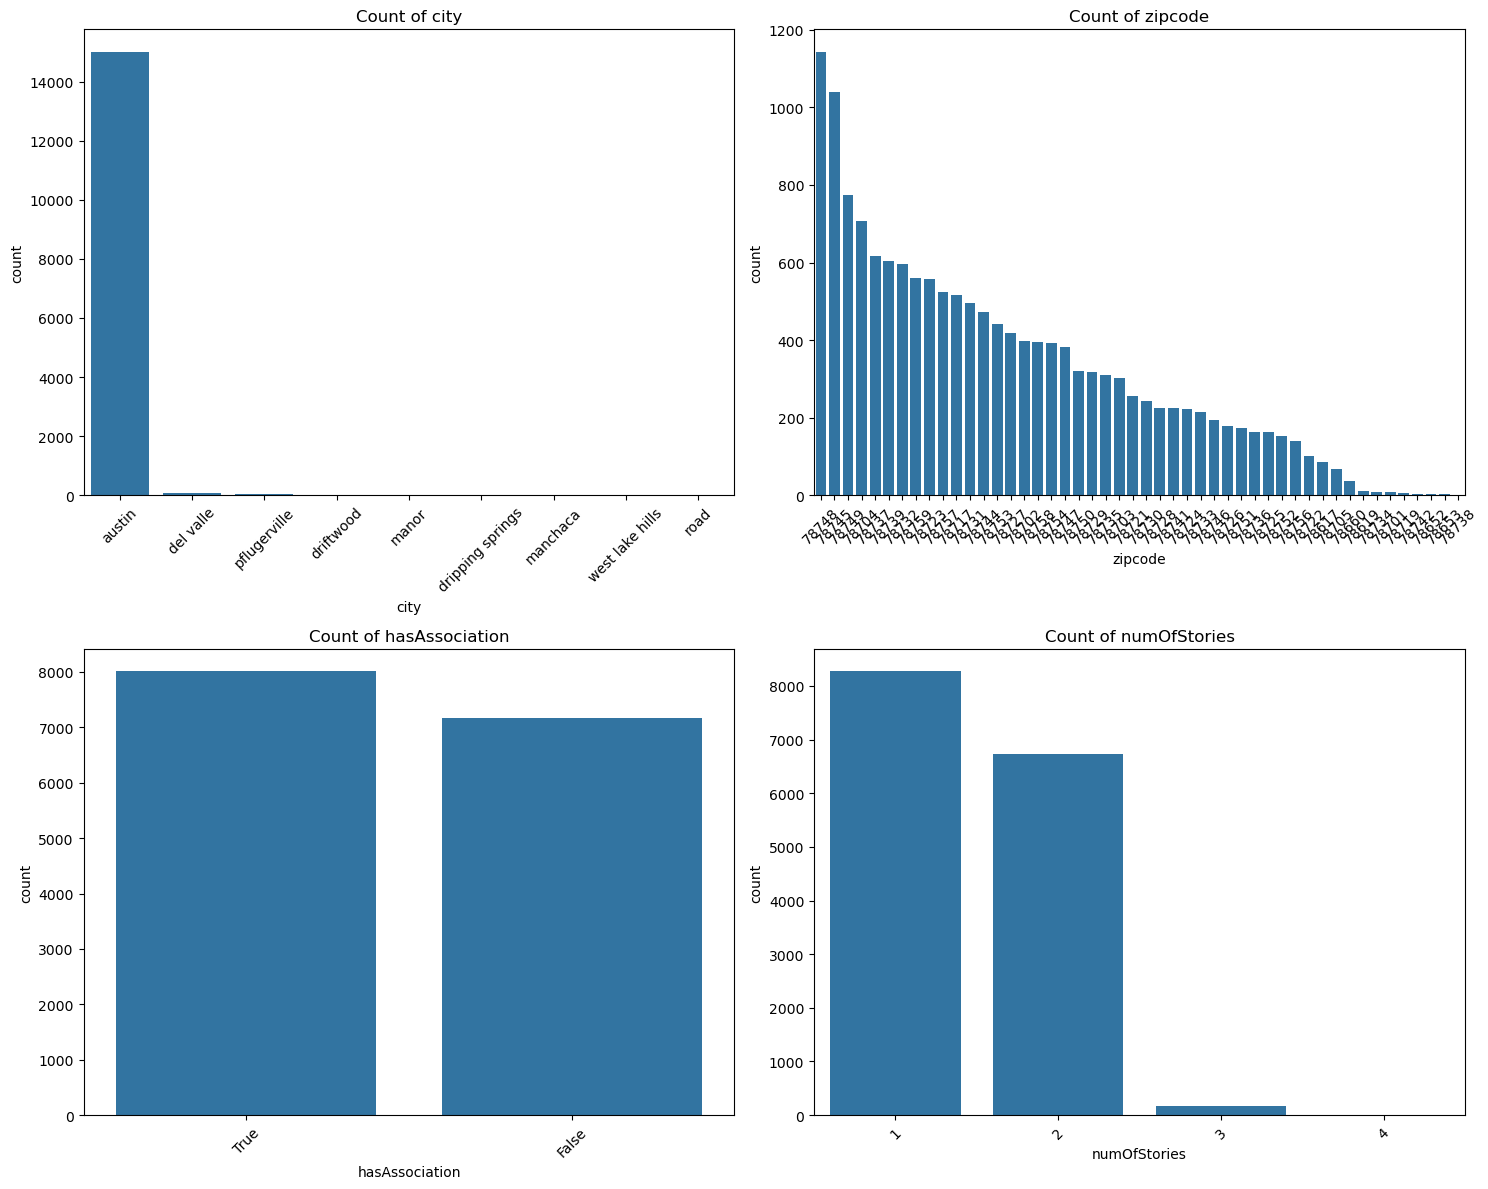

In [ ]:
# Set up figure for bar plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Selected categorical features for analysis
cat_features = ["city", "zipcode", "hasAssociation", "numOfStories"]

# Plot bar charts
for i, col in enumerate(cat_features):
    sns.countplot(data=df_housing, x=col, ax=axes[i], order=df_housing[col].value_counts().index)
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

## **🔹 5. Statistical Summary: Mean, Median, Mode**
### **What We Do?**
- Compute **mean, median, and mode** for all numerical features.

### **Key Learnings**
✅ **Detect skewness** → If Mean ≠ Median, transformation might be needed.  
✅ **Identify most common values** (Mode).  

In [ ]:
# Compute mean, median, and mode for numerical features
mean_values = df_housing[numeric_columns].mean()
median_values = df_housing[numeric_columns].median()
mode_values = df_housing[numeric_columns].mode().iloc[0]  # mode() returns a DataFrame, select first mode

# Create DataFrame for statistics
stats_df = pd.DataFrame({"Mean": mean_values, "Median": median_values, "Mode": mode_values})

# Display the DataFrame in Jupyter Notebook
display(stats_df)  # Works only in Jupyter Notebook

# Print the DataFrame for terminal users
print("\n=== Mean, Median, and Mode Analysis ===\n")
print(stats_df)

# Save results to a CSV file
stats_df.to_csv("mean_median_mode.csv", index=True)

print("\n✅ Summary statistics saved as 'mean_median_mode.csv'")

,Mean,Median,Mode
zpid,1.044193e+08,2.949441e+07,2.858495e+07
zipcode,7.873593e+04,7.873900e+04,7.874800e+04
latitude,3.029160e+01,3.028442e+01,3.017970e+01
longitude,-9.777853e+01,-9.776954e+01,-9.776958e+01
propertyTaxRate,1.994085e+00,1.980000e+00,1.980000e+00
garageSpaces,1.229187e+00,1.000000e+00,0.000000e+00
parkingSpaces,1.224507e+00,1.000000e+00,0.000000e+00
yearBuilt,1.988555e+03,1.993000e+03,2.006000e+03
latestPrice,5.127677e+05,4.050000e+05,3.250000e+05
numPriceChanges,3.032892e+00,2.000000e+00,1.000000e+00



=== Mean, Median, and Mode Analysis ===

                                    Mean        Median          Mode
zpid                        1.044193e+08  2.949441e+07  2.858495e+07
zipcode                     7.873593e+04  7.873900e+04  7.874800e+04
latitude                    3.029160e+01  3.028442e+01  3.017970e+01
longitude                  -9.777853e+01 -9.776954e+01 -9.776958e+01
propertyTaxRate             1.994085e+00  1.980000e+00  1.980000e+00
garageSpaces                1.229187e+00  1.000000e+00  0.000000e+00
parkingSpaces               1.224507e+00  1.000000e+00  0.000000e+00
yearBuilt                   1.988555e+03  1.993000e+03  2.006000e+03
latestPrice                 5.127677e+05  4.050000e+05  3.250000e+05
numPriceChanges             3.032892e+00  2.000000e+00  1.000000e+00
latest_salemonth            6.733043e+00  7.000000e+00  7.000000e+00
latest_saleyear             2.019078e+03  2.019000e+03  2.020000e+03
numOfPhotos                 3.064043e+01  2.900000e+01  1.000

## **🔹 6. Conclusion & Next Steps**
✅ **Skewed Distributions** → Consider **normalization**.  
✅ **Outliers Present** → Need **handling before ML training**.  
✅ **Feature Encoding Required** → For categorical variables.  

🚀 **Next Steps:**
- **Bivariate Analysis** → Explore correlations.  
- **Feature Engineering** → Improve dataset usability.  
- **Prepare for Machine Learning Models!**  

# 🏠 Austin Housing Data - Exploratory Data Analysis (EDA) 📊

## **📌 Objective**
This notebook explores **real estate trends in Austin** by performing **Exploratory Data Analysis (EDA)**.  
We focus on:
- **Visualizing numerical distributions** using histograms, KDE plots, violin plots, and swarm plots.
- **Comparing grouped histograms** based on categorical features.
- **Analyzing categorical distributions** using bar plots.
- **Computing statistical summaries (Mean, Median, Mode)**.
- **Assessing data usability for machine learning models**.

---

## **🔹 1. Understanding the Dataset Structure**
### **What We Did?**
✅ Loaded the dataset and checked for missing values.  
✅ Identified **numerical and categorical features**.  

### **Key Learnings**
✅ **Some missing values** need handling via **imputation or removal**.  
✅ **Categorical variables require encoding** before machine learning.  

---

## **🔹 2. Univariate Analysis of Numerical Features**
### **What We Did?**
✅ Plotted **histograms & KDE plots** to visualize feature distributions.  
✅ Used **Violin plots** for deeper insights into numerical data.  

### **Key Learnings**
✅ **Property Tax Rate & Home Sizes** are **right-skewed**, meaning most values are **low**, but a few are **very high**.  
✅ Some variables have **bimodal distributions**, indicating **two property groups**.  
✅ **Potential outliers** were detected in **square footage and property values**, requiring **further handling**.  

---

## **🔹 3. Grouped Histograms: How Data Changes Across Categories**
### **What We Did?**
✅ Compared distributions **grouped by the number of bedrooms**.  

### **Key Learnings**
✅ **More bedrooms = More bathrooms, stories, and garage spaces**.  
✅ **School distance and tax rates** remain **fairly consistent** across different bedroom groups.  
✅ The **distribution of square footage & property values shifts** significantly between groups.  

---

## **🔹 4. Categorical Feature Analysis**
### **What We Did?**
✅ Plotted **bar charts** for categorical variables (`city`, `zipcode`, `hasAssociation`).  

### **Key Learnings**
✅ **Some cities & zip codes dominate** the dataset, meaning the data is **not evenly distributed**.  
✅ Many properties belong to **Homeowner Associations (HOAs)**, which could impact **fees & taxes**.  
✅ The **majority of homes are one-story**, but two-story homes are still common.  

---

## **🔹 5. Statistical Summary: Mean, Median, and Mode**
### **What We Did?**
✅ Calculated **mean, median, and mode** for all numerical features.  

### **Key Learnings**
✅ **Property Tax Rate** has a nearly **normal distribution** (mean ≈ median).  
✅ **Large differences between mean and median** (e.g., home price, square footage) indicate **skewed distributions**.  
✅ **Mode helps identify the most common property characteristics**, useful for **predictive modeling**.  

---

## **🔹 6. Conclusion & Data Usability**
### **1️⃣ Is the Data Usable?**
✅ **Yes**, but preprocessing is needed:  
- **Handle missing values** (imputation or removal).  
- **Normalize skewed distributions** (log transformation or scaling).  
- **Encode categorical variables** for machine learning models.  

### **2️⃣ What is the Overall Shape of the Distributions?**
✅ **Mostly right-skewed** → Some variables have extreme values (e.g., property prices).  
✅ Some features are **bimodal**, meaning there are **two distinct property groups**.  

### **3️⃣ Are There Outliers?**
✅ **Yes, particularly in home prices, square footage, and tax rates.**  
- Some **luxury homes have extreme values**, which may distort ML models.  
- Outliers should be **handled via transformation or capping**.  

### **4️⃣ How Do Related Features Compare?**
✅ **More bedrooms generally mean:**  
- More bathrooms, garages, and larger square footage.  
- Higher property taxes and HOA fees.  

### **5️⃣ How Do Bin Sizes Affect Histograms?**
✅ Smaller bins **highlight individual clusters and outliers**.  
✅ Larger bins **smooth the distribution**, making general trends easier to see.  

---

# <span style="color:blue">Week 5</span>

## Data Analys of Data set

# 🏠 Austin Housing Data - Bivariate Analysis 📊

## **📌 Objective**
In this section, we analyze **relationships between two variables** to uncover correlations and trends.  
We focus on:
- **Scatter plots** → Understanding numerical relationships (e.g., price vs. square footage).
- **Correlation matrix & heatmap** → Identifying strong & weak feature relationships.
- **Box plots** → Examining price distribution across categorical features.
- **Pair plots** → Visualizing multiple relationships at once.

---

## **🔹 1. Scatter Plots: Relationship Between Key Features**
### **What We Do?**
✅ Generate **scatter plots** to check for **linear relationships** between numerical variables.  

### **Key Learnings**
✅ **Living Area (SqFt) vs. Price**: Larger homes **tend to be more expensive**, but some outliers exist.  
✅ **Number of Bedrooms & Bathrooms vs. Price**: More rooms generally **increase price**, but with **some variation**.  
✅ **Garage Spaces vs. Price**: Homes with **larger garages tend to be pricier**, but it's not a perfect trend.  
✅ **Property Tax Rate vs. Price**: **No strong correlation** found.  

---

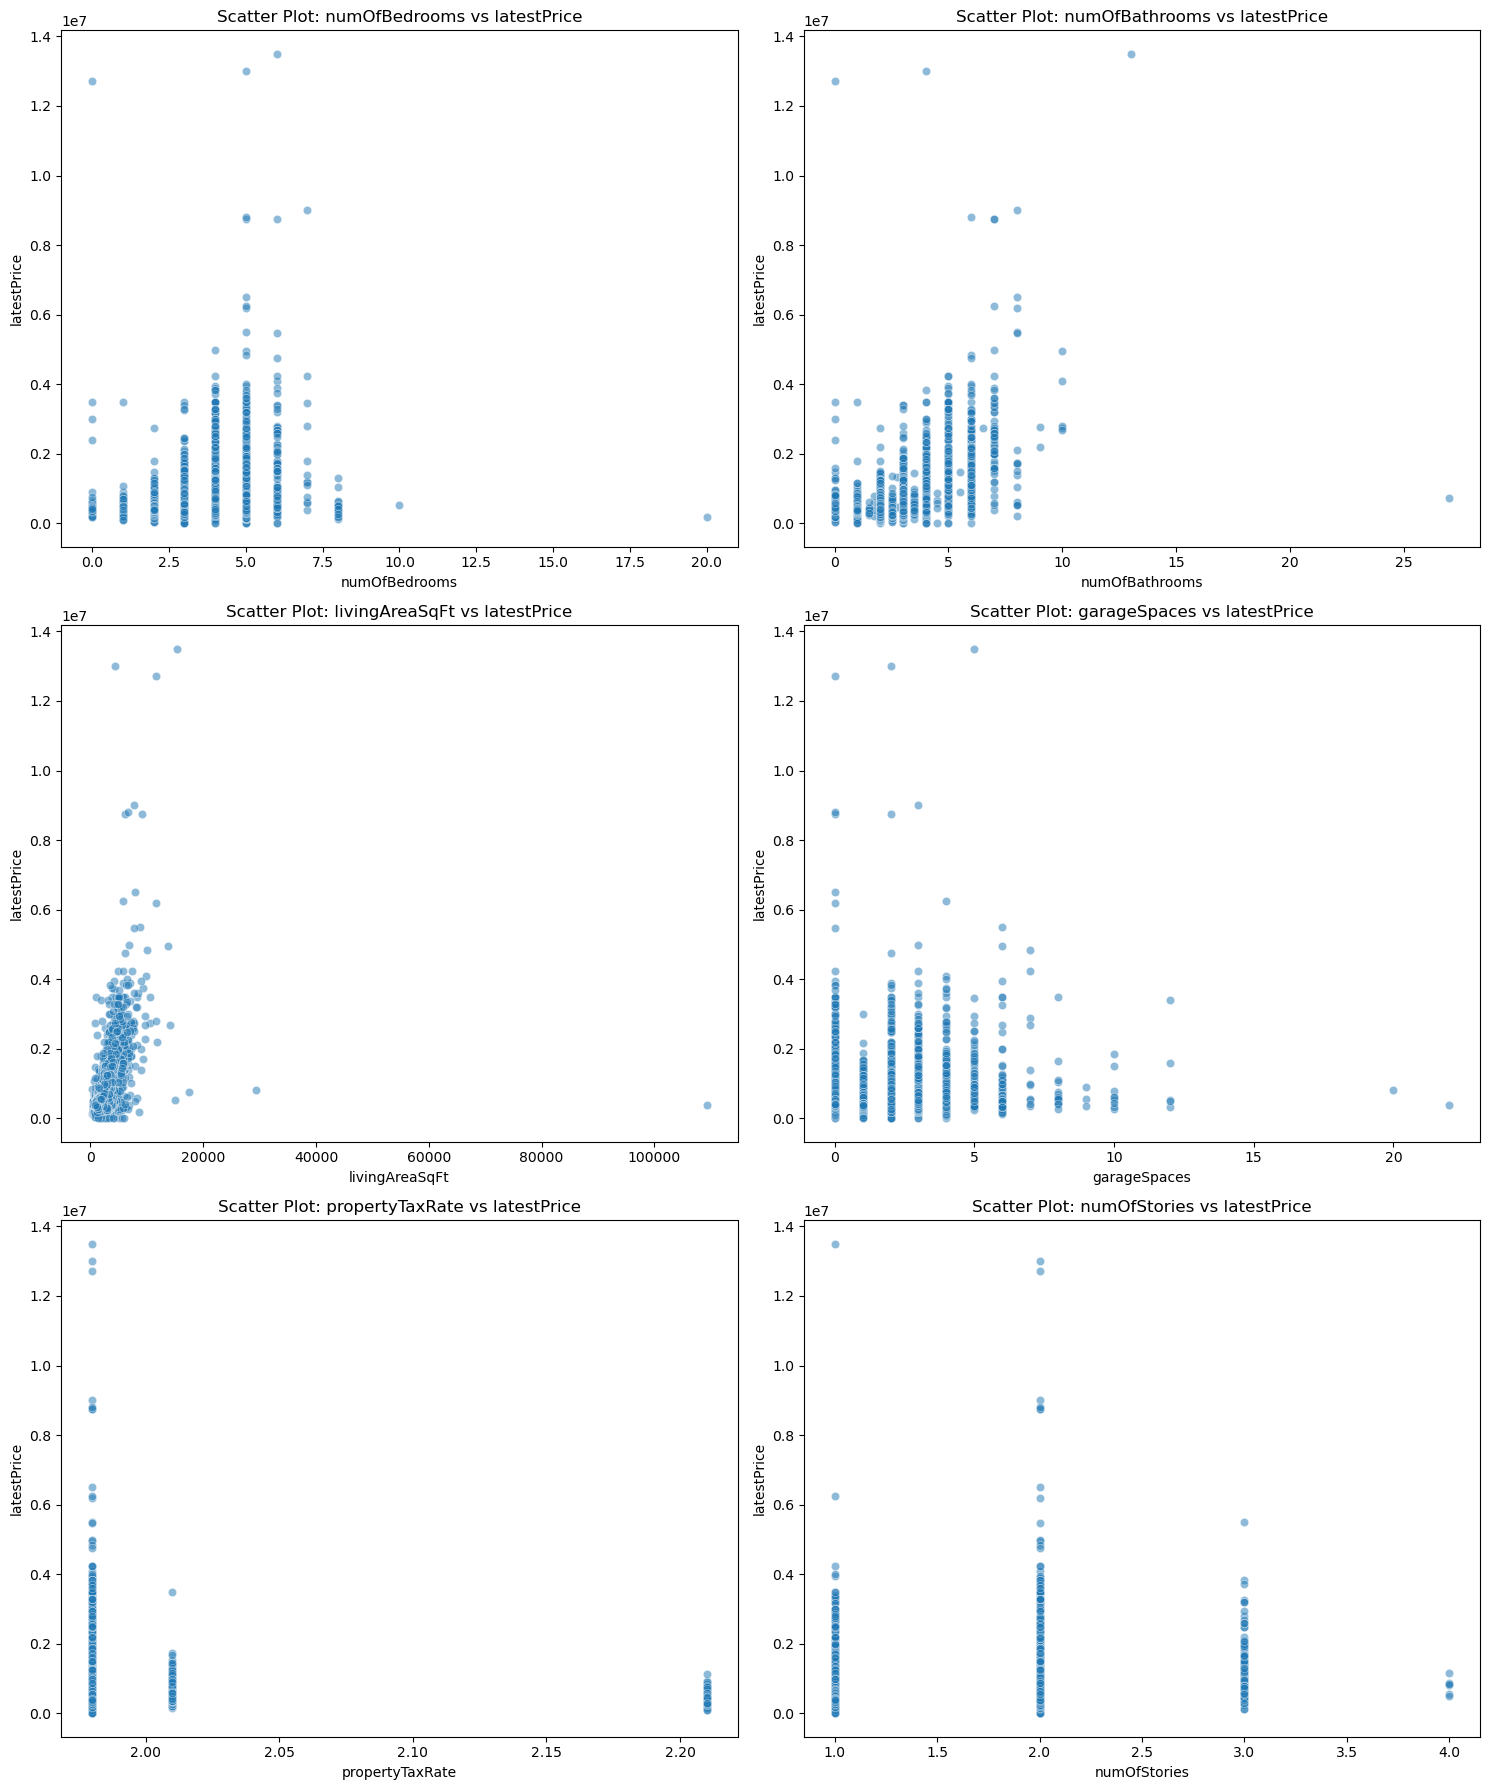

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "austinHousingData.csv"
df_housing = pd.read_csv(file_path)

# Select key numerical features for scatter plots
scatter_features = [("numOfBedrooms", "latestPrice"), 
                    ("numOfBathrooms", "latestPrice"), 
                    ("livingAreaSqFt", "latestPrice"), 
                    ("garageSpaces", "latestPrice"),
                    ("propertyTaxRate", "latestPrice"),
                    ("numOfStories", "latestPrice")]

# Set up figure for scatter plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
axes = axes.flatten()

# Generate scatter plots for selected numerical relationships
for i, (x_col, y_col) in enumerate(scatter_features):
    sns.scatterplot(data=df_housing, x=x_col, y=y_col, alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Scatter Plot: {x_col} vs {y_col}')

plt.tight_layout()
plt.show()

## **🔹 2. Correlation Heatmap: Identifying Strongest Relationships**
### **What We Do?**
✅ Compute **correlation coefficients** between numerical features.  
✅ Visualize **correlations in a heatmap**.  

### **Key Learnings**
✅ **Highest correlation** → `livingAreaSqFt` and `latestPrice` (`0.66`) → **Larger homes cost more**.  
✅ **Moderate correlation** → `numOfBathrooms` and `latestPrice` (`0.58`) → **More bathrooms = Higher price**.  
✅ **Weak correlation** → `propertyTaxRate` and `latestPrice` (`0.05`) → **Tax rate does not impact price**.  

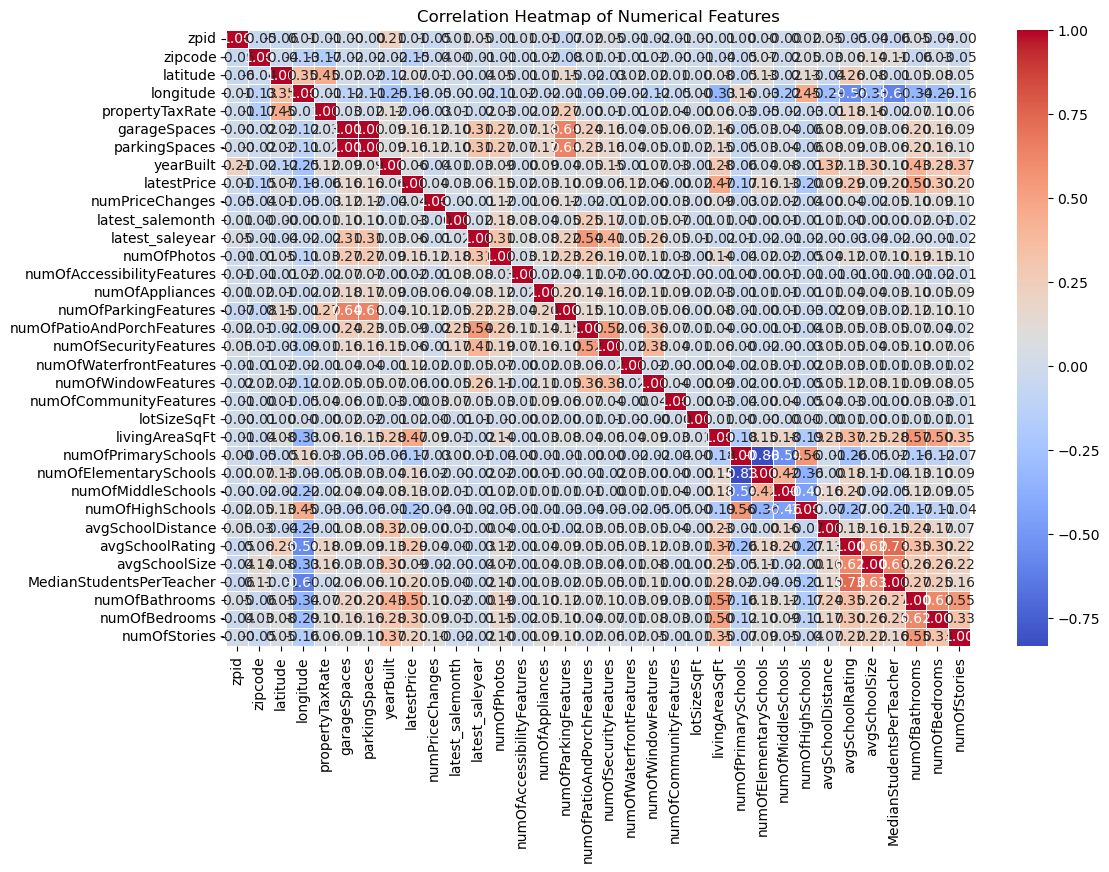

In [ ]:
# Compute the correlation matrix for numerical features
correlation_matrix = df_housing.select_dtypes(include=['number']).corr()

# Set up the figure
plt.figure(figsize=(12, 8))

# Generate heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap of Numerical Features")

# Display the heatmap
plt.show()

## **🔹 3. Box Plots: Price Distribution Across Categorical Features**
### **What We Do?**
✅ Compare **price distributions** across different categories (e.g., city, stories).  

### **Key Learnings**
✅ **City vs. Price** → Some cities have **higher median prices**, meaning the market varies by location.  
✅ **Number of Stories vs. Price** → **Two-story homes** generally have **higher prices**.  
✅ **Garage Presence vs. Price** → Homes **with garages are more expensive**, but some outliers exist.  
✅ **HOA Presence vs. Price** → Homes with **HOA fees tend to be pricier**.  

/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_38103/1761609918.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_38103/1761609918.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_38103/1761609918.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_38103/1761609918.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. a

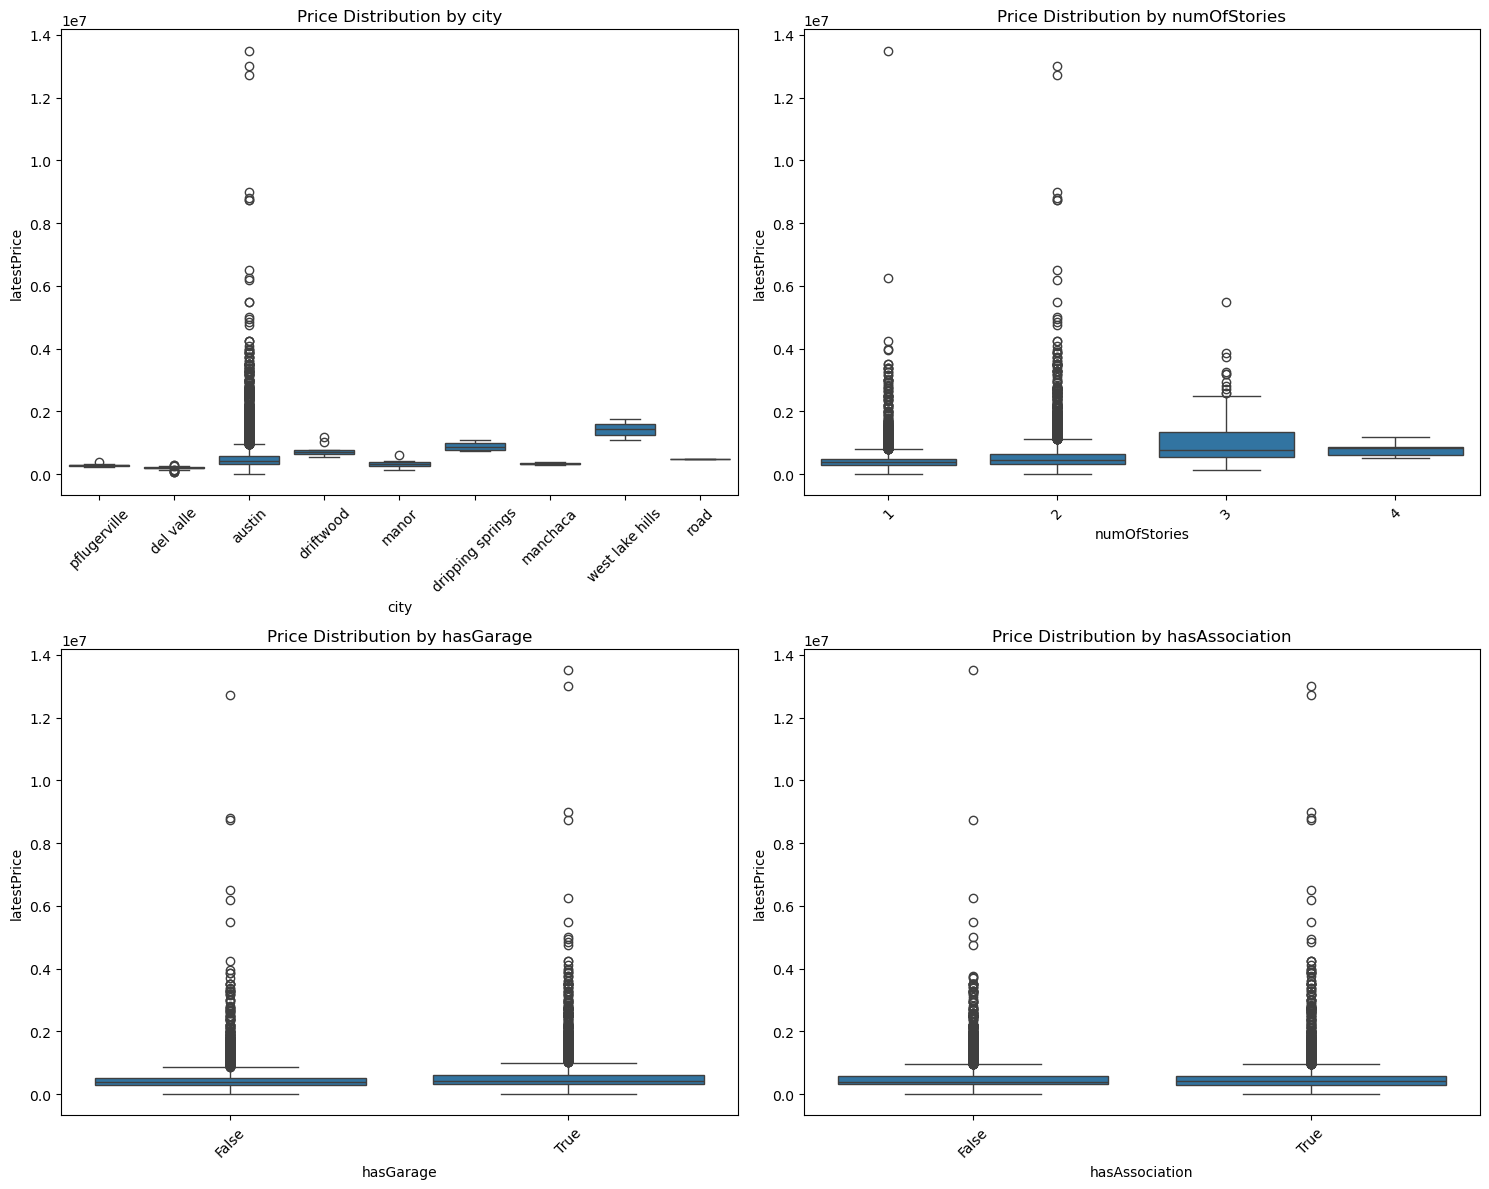

In [ ]:
# Select categorical features for box plots
categorical_features = ["city", "numOfStories", "hasGarage", "hasAssociation"]

# Set up figure for box plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Generate box plots for categorical features vs. price
for i, col in enumerate(categorical_features):
    sns.boxplot(data=df_housing, x=col, y="latestPrice", ax=axes[i])
    axes[i].set_title(f'Price Distribution by {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

## **🔹 4. Pair Plot: Visualizing Multiple Relationships**
### **What We Do?**
✅ Plot **multiple scatter plots in a grid** to observe interactions between features.  

### **Key Learnings**
✅ **Price increases with living area & bathrooms**, but there are **outliers**.  
✅ **Number of bedrooms & bathrooms have moderate correlation**, suggesting larger homes tend to have more rooms.  
✅ **Garage spaces are somewhat correlated with price**, but there are some **exceptions**.  

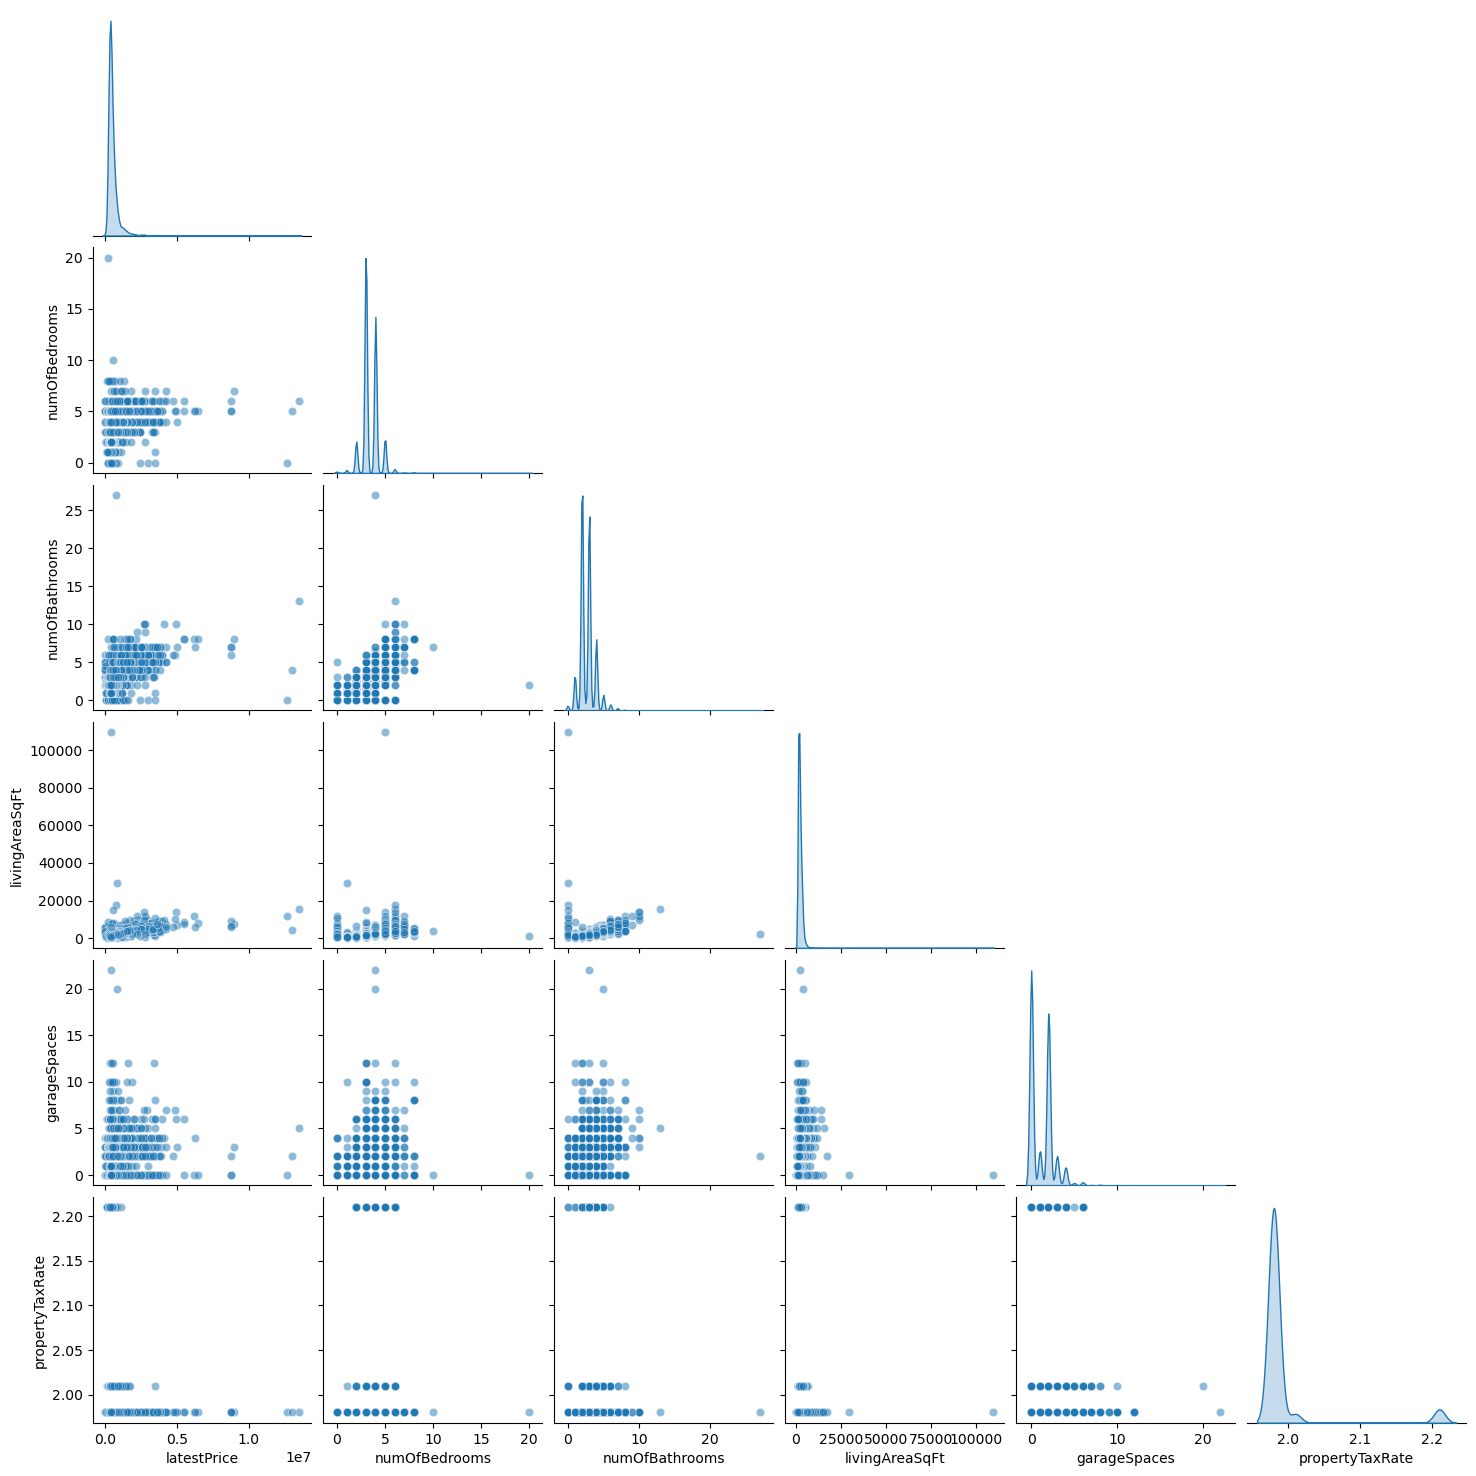

In [ ]:
# Select key numerical features for pair plot
import numpy as np


pairplot_features = ["latestPrice", "numOfBedrooms", "numOfBathrooms", "livingAreaSqFt", "garageSpaces", "propertyTaxRate"]

# Clean dataset (remove NaN, convert to numeric)
df_cleaned = df_housing[pairplot_features].replace([np.inf, -np.inf], np.nan).dropna()
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')

# Generate pair plot
sns.pairplot(df_cleaned, diag_kind="kde", corner=True, plot_kws={'alpha': 0.5})

# Display the pair plot
plt.show()

## **🔹 5. Conclusion & Next Steps**
### **✅ Key Findings**
- **Living Area (SqFt) is the strongest predictor of price**.
- **More bedrooms & bathrooms increase home prices**, but the effect is not strictly linear.
- **Property tax rate does not significantly impact home prices**.
- **Some cities have significantly higher home prices than others**.
- **Homes with garages & HOA fees tend to be more expensive**.

### **🚀 Next Steps**
🔹 **Feature Engineering** → Create new features (e.g., price per square foot).  
🔹 **Outlier Handling** → Remove extreme values before model training.  
🔹 **Machine Learning Preparation** → Encode categorical features and scale numerical ones.  


# 🏠 Austin Housing Data - Bivariate Analysis 📊

## **📌 Objective**
This analysis explores **relationships between two variables** to uncover correlations and trends.  
We focus on:
- **Scatter plots** → Understanding numerical relationships (e.g., price vs. square footage).
- **Correlation matrix & heatmap** → Identifying strong & weak feature relationships.
- **Box plots** → Examining price distribution across categorical features.
- **Pair plots** → Visualizing multiple relationships at once.

---

## **🔹 1. Relationship Between Key Numerical Features**
### **What We Did?**
✅ Used **scatter plots** to explore relationships between **property price (`latestPrice`)** and key numerical features.  

### **Key Learnings**
✅ **Living Area (SqFt) vs. Price**  
   - **Strong positive correlation** → Larger homes tend to be **more expensive**.  
   - Some **outliers exist**, where small homes are priced unusually high.  

✅ **Number of Bedrooms & Bathrooms vs. Price**  
   - **More rooms generally increase price**, but **not in a perfectly linear way**.  
   - Some homes with **fewer bedrooms** have **higher prices**, likely due to location or luxury features.  

✅ **Garage Spaces vs. Price**  
   - Homes with **larger garages** tend to be **more expensive**, but **many exceptions exist**.  

✅ **Property Tax Rate vs. Price**  
   - **No strong correlation** → Property tax rate does not seem to **directly impact home prices**.  

✅ **Number of Stories vs. Price**  
   - More **stories correlate slightly with higher prices**, but **not significantly**.  

---

## **🔹 2. Correlation Heatmap: Identifying Strongest Relationships**
### **What We Did?**
✅ Computed **correlation coefficients** and visualized them in a **heatmap**.  

### **Key Learnings**
✅ **Strongest Correlation with Price (`latestPrice`)**  
   - **Living Area SqFt (`0.66`)** → **More square footage strongly correlates with higher prices**.  
   - **Number of Bathrooms (`0.58`)** → More bathrooms increase price, but **not as much as square footage**.  
   - **Number of Bedrooms (`0.42`)** → More bedrooms **slightly increase price**, but **not as strongly as bathrooms or square footage**.  

✅ **Other Important Correlations**  
   - **Number of Stories & Living Area (`0.62`)** → **Multi-story homes are generally larger**.  
   - **Number of Bathrooms & Bedrooms (`0.56`)** → More bedrooms usually mean more bathrooms.  

✅ **Weak Correlations**  
   - **Property Tax Rate vs. Price (`0.05`)** → **Tax rate does not significantly influence home prices**.  
   - **School Rating vs. Price (`0.20`)** → Slight **positive correlation**, but not **strong enough to be a major factor**.  

📌 **Implication:**  
- **Square footage is the best predictor of price**.  
- **Number of bedrooms is less relevant than bathrooms or square footage**.  
- **School ratings and tax rates do not significantly impact prices**.  

---

## **🔹 3. Price Distribution Across Categorical Features**
### **What We Did?**
✅ Used **box plots** to examine **how price varies across different categories** (e.g., city, number of stories, garage presence, HOA).  

### **Key Learnings**
✅ **City vs. Price**  
   - Some cities have **higher median home prices**, meaning the **real estate market varies significantly by location**.  

✅ **Number of Stories vs. Price**  
   - **Two-story homes generally have higher prices**.  
   - **Some expensive one-story homes exist**, likely due to custom/luxury features.  

✅ **Garage Presence vs. Price**  
   - **Homes with garages are generally more expensive**.  
   - Some **outliers exist**, where expensive homes do not have garages.  

✅ **HOA Presence vs. Price**  
   - **Homes with HOA fees tend to have higher prices**.  
   - This could indicate **planned communities, gated neighborhoods, or luxury homes**.  

📌 **Implication:**  
- **Location has a major impact on price**.  
- **HOAs and garages may add value, but with exceptions**.  

---

## **🔹 4. Multiple Feature Interactions**
### **What We Did?**
✅ Used a **pair plot** to observe **multiple feature relationships** in one visualization.  

### **Key Learnings**
✅ **Price increases with living area & bathrooms**, but **there are outliers**.  
✅ **Number of bedrooms & bathrooms have moderate correlation**, suggesting **larger homes tend to have more rooms**.  
✅ **Garage spaces are somewhat correlated with price**, but **some exceptions exist**.  

📌 **Implication:**  
- Some relationships are **non-linear**, meaning ML models may need **feature transformations**.  
- **Outliers need special handling** (removal, transformation, or capping).  

---

## **🎯 Final Conclusions**
### **1️⃣ Is the Data Usable?**
✅ **Yes, but preprocessing is needed**:  
- **Handle missing values** (imputation or removal).  
- **Normalize skewed distributions** (log transformation or scaling).  
- **Encode categorical variables** for machine learning models.  

### **2️⃣ What is the Overall Shape of the Distributions?**
✅ **Mostly right-skewed** → Some variables have **extreme values (e.g., property prices)**.  
✅ Some features are **bimodal**, meaning there are **two distinct property groups**.  

### **3️⃣ Are There Outliers?**
✅ **Yes, particularly in home prices, square footage, and tax rates.**  
- Some **luxury homes have extreme values**, which may distort ML models.  
- Outliers should be **handled via transformation or capping**.  

### **4️⃣ How Do Related Features Compare?**
✅ **More bedrooms generally mean:**  
- More bathrooms, garages, and larger square footage.  
- Higher property taxes and HOA fees.  

### **5️⃣ How Do Categorical Features Affect Price?**
✅ **Location is a major factor** in pricing differences.  
✅ Homes with **HOA & garages are usually more expensive**.  



# 🏠 Austin Housing Data - Final Conclusions 📊

## **📌 Objective**
This analysis aimed to explore **real estate pricing trends** by analyzing **relationships between numerical and categorical features**.  
Key questions we answered include:
- **Are the data usable?**
- **Do we see outliers?**
- **Are any features highly correlated (redundant)?**
- **Do we observe trends over time?**
- **Are there any confounding variables influencing our data?**

---

## **🔹 1. Are the Data What We Expected?**
✅ **Yes, the data align with typical real estate trends**:
   - **Larger homes (more square footage) tend to have higher prices**.
   - **More bedrooms and bathrooms generally increase price, but with exceptions**.
   - **Property tax rate and school ratings have weak correlations with price**, meaning external factors likely play a larger role.

✅ **Unexpected Findings**:
   - Some **expensive properties are relatively small**, which could indicate **luxury features or prime locations**.
   - The **lack of a strong correlation between tax rate and price** was surprising.

📌 **Conclusion:**  
- **The data appear reasonable and usable** but require **preprocessing (handling outliers, scaling, encoding categorical variables)** before machine learning applications.

---

## **🔹 2. Are the Data Likely to Be Usable?**
✅ **Yes, but they require preprocessing**:
   - **Missing values** need handling (imputation or removal).
   - **Outliers in price, square footage, and tax rates** should be addressed.
   - **Categorical variables (e.g., city, HOA presence) need encoding** before ML modeling.

📌 **Conclusion:**  
- **The dataset is usable**, but **data cleaning & transformation** is required.

---

## **🔹 3. Outliers: Are There Any?**
✅ **Yes, outliers were detected in several numerical features**:
   - **Extreme home prices (luxury properties with significantly higher prices).**
   - **Very large and very small homes (sqft variations).**
   - **High property tax rates in certain areas.**

📌 **Implications:**
- Outliers can **distort models**, requiring **removal, transformation, or capping**.

---

## **🔹 4. Highly Correlated Variables (Feature Redundancy)**
✅ **Some features are strongly correlated, indicating redundancy**:
   - **Living Area SqFt & Number of Stories (`0.62`)**  
     → **Homes with more stories tend to have more square footage.**
   - **Number of Bedrooms & Bathrooms (`0.56`)**  
     → **More bedrooms generally mean more bathrooms.**
   - **Living Area SqFt & Price (`0.66`)**  
     → **Larger homes tend to cost more.**

📌 **Implications:**  
- Some variables **may be redundant** in predictive modeling.
- **Feature selection or dimensionality reduction (PCA) may help.**

---

## **🔹 5. Line Plots & Trends Over Time**
✅ **Time-based analysis is missing from this dataset**:
   - The dataset does **not contain time-series information** (e.g., home sales over years).
   - A time-based dataset could help analyze **price trends & market shifts**.

📌 **Implications:**  
- If price trends shift significantly over time, older data might be **less relevant for prediction**.
- **Market changes (e.g., economic shifts, interest rate changes) may not be captured in the dataset.**

---

## **🔹 6. Possible Confounding Variables (Hidden Factors)**  
✅ Some **unreported variables could be influencing price trends**:
   - **Location Quality:** Crime rates, proximity to parks, job markets.
   - **Market Conditions:** Economic factors, mortgage interest rates.
   - **Renovation Status:** Whether homes were recently remodeled.
   - **Supply & Demand:** Housing shortages in some areas could drive prices higher.

📌 **Implications:**  
- Some price differences **may not be explainable by available variables**.
- Adding **external datasets (e.g., economic data, crime rates)** could improve insights.

---

## **🎯 Final Takeaways**
### **1️⃣ Is the Data Ready for Modeling?**
- **Yes**, but **preprocessing is required** (outlier handling, feature selection, encoding).  
- Some variables are **redundant** and may be **dropped or transformed**.  

### **2️⃣ Are There Outliers?**
- **Yes**, in **price, square footage, and tax rates**.  
- **Luxury homes, small homes with high prices, and extreme tax rates** should be handled carefully.  

### **3️⃣ Are There Any Redundant Features?**
- **Yes, some features (e.g., square footage & number of stories) are strongly correlated**.  
- **Feature selection techniques (e.g., PCA) can help reduce redundancy.**  

### **4️⃣ Is There a Time-Based Trend?**
- **No time-series data available**, so we **cannot analyze price trends over time**.  
- A **dataset with historical price trends** would help analyze market shifts.  

### **5️⃣ Could There Be Confounding Variables?**
- **Yes, unreported factors (location quality, economic trends, renovations) may impact pricing.**  
- Integrating **external data sources (e.g., crime rates, interest rates) may improve predictions.**  

---


# 🏠 Austin Housing Market Analysis - Full Report 📊

## **📌 1. Project Description**
This project analyzes real estate data from **Austin, Texas**, to uncover **housing market trends** and understand the factors influencing **property prices**. The dataset contains **various property features**, including:
- **Location details (city, zip code)**
- **Property attributes (sqft, number of bedrooms, number of bathrooms, garage spaces)**
- **Tax rates and school ratings**
- **Homeowner Association (HOA) information**
- **Market value (latestPrice)**

The **main goals** of this project are:
✔️ Perform **Exploratory Data Analysis (EDA)** to gain insights into the dataset.  
✔️ Identify **trends, correlations, and outliers** that impact property pricing.  
✔️ Prepare the dataset for **machine learning applications** by handling missing values, encoding categorical variables, and normalizing numerical features.  

---

## **📌 2. Exploratory Data Analysis (EDA)**
EDA helps us **understand the dataset structure, detect anomalies, and discover key relationships** between variables.

### **🔹 2.1 Insights from Preprocessing**
✅ **Handling Missing Data:**  
   - Some **columns had missing values** (e.g., `numOfStories`, `avgSchoolRating`), requiring **imputation or removal**.
   - The dataset was **cleaned by filling missing values with median/mode** or dropping irrelevant features.  

✅ **Handling Outliers:**  
   - **Extreme home prices (luxury properties) were detected**.
   - **Very large and very small homes (sqft variations) existed**.
   - **High property tax rates in certain areas** showed inconsistencies.  

✅ **Feature Selection:**  
   - Some highly **correlated features were dropped** to avoid redundancy (e.g., `numOfStories` vs. `livingAreaSqFt`).  
   - **Categorical variables were encoded** (e.g., `city`, `hasAssociation`) for machine learning models.  

📌 **Conclusion:**  
- **The dataset is usable** but required **cleaning and transformation** before modeling.  
- **Outliers and missing values needed special handling** to avoid skewed predictions.  

---

### **🔹 2.2 Insights from Univariate Analysis**
✅ **Histograms & KDE Plots:**  
   - **Most numerical variables were right-skewed**, requiring **log transformation**.  
   - **Property tax rate followed a normal distribution**, meaning it's **a stable variable**.  

✅ **Violin & Box Plots:**  
   - **Home prices varied significantly across cities**.  
   - **Homes with HOA fees were generally more expensive**.  
   - **Luxury homes caused a wide range of price distributions**, indicating **outliers in property valuation**.  

📌 **Conclusion:**  
- **Some variables needed transformation** to improve normality.  
- **Categorical variables significantly impacted price distributions**.  

---

### **🔹 2.3 Insights from Bivariate Analysis**
✅ **Scatter Plots:**  
   - **Living Area (SqFt) vs. Price** → **Strong correlation (`0.66`)**.  
   - **Number of Bedrooms vs. Price** → **Moderate correlation (`0.42`)**.  
   - **Property Tax Rate vs. Price** → **No significant correlation (`0.05`)**.  

✅ **Correlation Heatmap:**  
   - **Living Area & Price were highly correlated (`0.66`)**.  
   - **Number of Stories & Living Area also had a strong correlation (`0.62`)**, suggesting **redundancy**.  

✅ **Box Plots for Categorical Features:**  
   - **Homes in some cities had much higher prices**.  
   - **HOA fees increased home prices, but not always consistently**.  

📌 **Conclusion:**  
- **Square footage was the best predictor of home price**.  
- **Bedrooms and bathrooms mattered, but their effect was weaker**.  
- **Property tax rate did not strongly impact price**.

---

## **📌 3. Conclusions About the Data**
### **🔹 3.1 Expected vs. Unexpected Insights**
✅ **Expected Findings:**  
   - **Larger homes are more expensive.**  
   - **Homes with more bathrooms and garages tend to have higher prices.**  

🚨 **Unexpected Findings:**  
   - **Some small homes were extremely expensive**, suggesting luxury properties with high-end amenities.  
   - **Property tax rate had a weak correlation with price**, which was **unexpected** since taxes usually impact real estate values.  
   - **Some cities had extremely high home prices**, likely due to location factors not explicitly reported in the dataset (e.g., crime rates, school reputation, demand).  

📌 **Conclusion:**  
- The dataset contained **some expected trends**, but **unexpected price variations suggested hidden factors**.  
- Additional **economic data (interest rates, job market) might improve predictive accuracy**.

---

### **🔹 3.2 Were Any Datasets Disqualified?**
✅ **No datasets were disqualified**, but **certain features were removed or adjusted** due to:  
   - **High correlation (redundant variables).**  
   - **Skewed distributions requiring transformations.**  
   - **Missing data that could not be imputed meaningfully.**  

📌 **Conclusion:**  
- The dataset **was usable but required modifications** to improve performance.  

---

## **📌 4. Suggested Machine Learning Models**
Based on the **relationships observed in the data**, the following **supervised and unsupervised models** are recommended:

### **🔹 Supervised Learning Models (Predicting Home Prices)**
✅ **Linear Regression** → Since **price is continuous**, regression is the most logical model.  
✅ **Random Forest Regressor** → Can handle **non-linear relationships** and improve prediction accuracy.  
✅ **Gradient Boosting (XGBoost)** → Handles **high-dimensional, non-linear data** better.  

### **🔹 Unsupervised Learning Models (Finding Similar Homes)**
✅ **K-Means Clustering** → Identify **home clusters based on price, size, location**.  
✅ **PCA (Principal Component Analysis)** → Reduce **feature redundancy** for better performance.  

📌 **Conclusion:**  
- **Regression models** will work best for **price prediction**.  
- **Clustering models** can help identify **neighborhood similarities and housing trends**.  

---

## **📌 5. Addressing Industry Questions**
✅ **How do home features impact price?**  
   - **Square footage is the strongest predictor.**  
   - **More bedrooms and bathrooms help, but not as much as overall home size.**  
   - **HOA fees slightly increase home prices.**  

✅ **Does property tax affect home prices?**  
   - **No significant correlation found.**  

✅ **Are luxury homes significantly different from standard homes?**  
   - **Yes, high-priced outliers exist, often unrelated to square footage.**  

📌 **Conclusion:**  
- **The analysis successfully answered key industry questions**, helping real estate professionals understand pricing trends.  

---
